In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from qutip import (about, basis, destroy, entropy_vn, expect, fock, SESolver, mesolve, sesolve, ptrace,
                   qeye, tensor, wigner, sigmaz,create, destroy, Qobj)


%matplotlib inline

In [3]:
class Hamiltonian:
    def __init__(self, wa, wc, Omega, N, perturb):
        self.wa = wa
        self.wc = wc
        self.Omega = Omega
        self._Hjc(N, perturb = perturb)
    def _Hjc (self, N, perturb = False):
        # N = number of photon states (number of photons + 1(no photon state) )
        Omega = self.Omega
        wc = self.wc
        wa = self.wa
        sigma_z = tensor(qeye(N), sigmaz())
        a = tensor(destroy(N), qeye(2))
        a_dag = a.dag()
        sig_p = tensor(qeye(N), create(2))
        sig_m = sig_p.dag()

        int_excitation = tensor(destroy(N), create(2))
        int_deexcitation = tensor(create(N), destroy(2))
        int_perturb = tensor(destroy(N), destroy(2)) + tensor(create(N), create(2))

        if perturb == True:
            self.H_JC = (wa/2 * sigma_z + wc * a_dag*a + Omega/2 * (int_excitation + int_deexcitation + int_perturb))
        else:
            self.H_JC = (wa/2 * sigma_z + wc * a_dag*a + Omega/2 * (int_excitation + int_deexcitation))

In [4]:
Hamiltonian(10, 0.5, 2, 2, False).H_JC
Hamiltonian(10, 0.5, 2, 2, True).H_JC


Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 5.   0.   0.   1. ]
 [ 0.  -5.   1.   0. ]
 [ 0.   1.   5.5  0. ]
 [ 1.   0.   0.  -4.5]]

In [5]:
import numpy as np

N=2
times = np.linspace(0.0, 20.0, 100)
psi0 = tensor(fock(N, 1), fock(2,0) )
psi1 = tensor(fock(N, 1), fock(2,1) )
a = tensor(destroy(N),qeye(2))
sm = tensor(qeye(N),destroy(2))
sigma_z = -tensor(qeye(N),sigmaz())
print("psi0" , psi0)
print("psi",psi1)

wc= 0.5
wa= 10
d = wa-wc

Omega=0
# decoupled Hamiltonian
H0 = wc * a.dag() * a + wa/2 * sigma_z
# interaction Hamiltonian
#H1 = Omega/2 * (a.dag() + a) * (sm + sm.dag()) 
    
H1 = Omega/2 * ((a.dag() * sm) + (sm.dag()*a)) #truncation / approximation

H = H0 + H1
    
evals, evecs = H.eigenstates()
print(evecs)

for i in range(0,len(evecs)):
    if evecs[i] == [1.,0.,0.,0.]:
        print(evecs[i])
        
        
        

# Example quantum object with expected properties
expected_data = np.array([[0.], [0.], [0.], [1.]])
expected_dims = [[2, 2], [1, 1]]
expected_shape = (4, 1)
expected_type = 'ket'


for i in range(0,len(evecs)):
    if (np.array_equal(evecs[i].full(), expected_data) and
    evecs[i].dims == expected_dims and
    evecs[i].shape == expected_shape and
    evecs[i].type == expected_type):
        print("The quantum object matches the expected properties.")
        deneme=evecs[i].overlap(psi1)*np.conjugate(evecs[i].overlap(psi1))
    else:
        print("The quantum object does not match the expected properties.")
        
print(deneme)

print(H.eigenstates)
evals,estates=H.eigenstates()
print(evals)
print(H.eigenenergies())
        



psi0 Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]
psi Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]]
[Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
 Qobj data =
 [[1.]
  [0.]
  [0.]
  [0.]]
 Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.]
  [0.]
  [1.]
  [0.]]
 Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.]
  [1.]
  [0.]
  [0.]]
 Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [1.]]                                                                      ]
The quantum object does not match the expected properties.
The quantum object does not match the expected properties.
The quantum object does not match the expected properties.
The quantum object matches the expe

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.        ]
 [0.77637531]
 [0.63027088]
 [0.        ]]
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.        ]
 [ 0.63027088]
 [-0.77637531]
 [ 0.        ]]
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.        ]
 [0.77766609]
 [0.62867755]
 [0.        ]]
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.        ]
 [ 0.62867755]
 [-0.77766609]
 [ 0.        ]]
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.        ]
 [0.77900477]
 [0.62701799]
 [0.        ]]
Quantum object: dims=[[2, 2], [1, 

/var/folders/f7/bgyj513d5qj_1w7dm650_8cc0000gn/T/ipykernel_1085/2807143393.py:90: RuntimeWarning: invalid value encountered in scalar divide
  analytical_k2 = (Omega**2/4 *1) / (d**2 / 2 - d *np.sqrt(d**2/4 + Omega **2/4 * 1) + 2 * Omega ** 2/4 *1 )


ValueError: x and y must be the same size

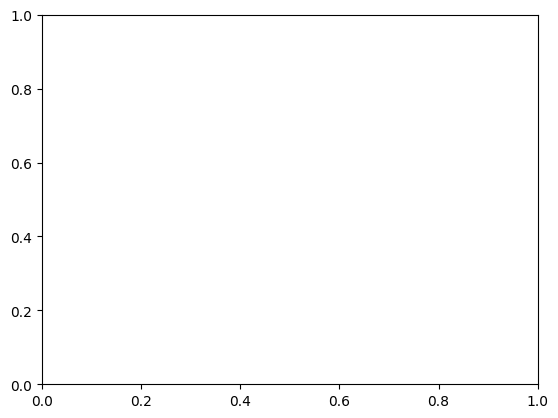

In [6]:
import numpy as np

N=2
times = np.linspace(0.0, 20.0, 100)
psi0 = tensor(fock(N, 1), fock(2,1) )
psi1 = tensor(fock(N, 1), fock(2,1) )
a = tensor(destroy(N),qeye(2))
sm = tensor(qeye(N),destroy(2))
sigma_z = tensor(qeye(N),sigmaz())


wc= 0.5
wa= 10
d = wa-wc

c_0_evlt=[]
c_1_evlt=[]
Omega_vals=[]
k1_vals = []
k2_vals =[]
wiki_vals = []
wiki_vals2=[]


# Expected ground state quantum object with expected properties
expected_data = np.array([[1.], [0.], [0.], [0.]])
expected_dims = [[2, 2], [1, 1]]
expected_shape = (4, 1)
expected_type = 'ket'

# Expected excited state quantum object with expected properties
expected_data2 = np.array([[0.], [0.], [0.], [1.]])


for i in range(-50,50):
    Omega = i
    # print(i)
    Omega_vals.append(i)
# decoupled Hamiltonian
    H0 = wc * a.dag() * a + wa/2 * sigma_z
# interaction Hamiltonian
    #H1 = Omega/2 * (a.dag() + a) * (sm + sm.dag()) 
    
    H1 = Omega/2 * ((a.dag() * sm) + (sm.dag()*a)) #truncation / approximation
    #H=Hamiltonian(wa, wc, Omega, N, False).H_JC
    #H=Hamiltonian(10, 0.5, 2, 2, True).H_JC
    H = H0 + H1
    
# Find the eigenstates of the Hamiltonian
    evals, evecs = H.eigenstates()
# Time evolution
    result = sesolve(H, psi0, times)
# Check higher eigenstates
    num_eigenstates = 4
    c = [[] for _ in range(num_eigenstates)]

    #for state in result.states:
     #   for i in range(num_eigenstates):
        #c[i].append(evecs[i].overlap(state).real)
        
      #      c[i].append(evecs[i].dag() * state) 
      
    for i in range(num_eigenstates):
        c[i].append(evecs[i].overlap(psi0)*np.conjugate(evecs[i].overlap(psi0)))
        

    for i in range(0,len(evecs)):
        if (not np.array_equal(evecs[i].full(), expected_data) and
        not (np.array_equal(evecs[i].full(), expected_data2)) and
        evecs[i].dims == expected_dims and
        evecs[i].shape == expected_shape and
        evecs[i].type == expected_type):
            print(evecs[i])
            c[0].append(evecs[i].overlap(psi1)*np.conjugate(evecs[i].overlap(psi1)))
        elif not (np.array_equal(evecs[i].full(), expected_data2) and
        not np.array_equal(evecs[i].full(), expected_data) and
        evecs[i].dims == expected_dims and
        evecs[i].shape == expected_shape and
        evecs[i].type == expected_type):
            print(evecs[i])
            c[1].append(evecs[i].overlap(psi1)*np.conjugate(evecs[i].overlap(psi1)))

    c_0_evlt.append(c[0])
    c_1_evlt.append(c[1])
    
    
    
  
    analytical_k1 = (Omega**2/4 *1) / (d**2 / 2 + d *np.sqrt(d**2/4 + Omega **2/4 * 1) + 2 * Omega ** 2/4 *1 )
    analytical_k2 = (Omega**2/4 *1) / (d**2 / 2 - d *np.sqrt(d**2/4 + Omega **2/4 * 1) + 2 * Omega ** 2/4 *1 )
    k1_vals.append(analytical_k1)
    k2_vals.append(analytical_k2)
    wiki = np.sin((np.arctan(Omega*(np.sqrt(1))/d))/2)
    wiki_vals.append(wiki**2)
    wiki2 = np.cos((np.arctan(Omega*(np.sqrt(1))/d))/2)
    wiki_vals2.append(wiki2**2)
    
# mpl.rc("figure", figsize=(10, 8))
plt.figure()
#plt.plot(Omega_vals, c_0_evlt, label=f"|c{1}|^2", color ="red")
#plt.plot(Omega_vals, c_1_evlt, label=f"|c{2}|^2", color ="red")

plt.scatter(Omega_vals, c_0_evlt, label="Numerical", color ="red")
plt.scatter(Omega_vals, c_1_evlt, color ="red")

#plt.plot(Omega_vals, k1_vals, label=f"|k{1}|^2", color ="blue")
#plt.plot(Omega_vals, k2_vals, label=f"|k{2}|^2", color ="blue")

plt.plot(Omega_vals, k2_vals, label="Analytical", color ="blue")
#plt.plot(Omega_vals, k1_vals, color ="blue")

#plt.plot(Omega_vals, wiki_vals, label ="wiki", color ="black")
#plt.plot(Omega_vals, wiki_vals2, label ="wiki", color ="black")
plt.xlabel("Omega")
plt.ylabel("Probability of Wavefunctions")
plt.title("|c1|^2 & |c2|^2 vs Omega") #Note that these are the coefficients of psi0 and psi1 i.e. ground and excited states not the eigenstates!!
plt.legend()
plt.grid()
plt.show()



[np.complex128(0j), np.complex128(0.0014144580778884814+1.6987112791956972e-22j), np.complex128(0.0028286865597844358-2.2821072201964756e-21j), np.complex128(0.0042424557290049+1.3843972517541856e-21j), np.complex128(0.005655536670585594-1.4017726527403922e-20j), np.complex128(0.007067700117949062+4.0434148950150034e-21j), np.complex128(0.008478716047203554-1.3145610867341273e-20j), np.complex128(0.009888356089807588-2.4446067423209372e-20j), np.complex128(0.011296390888570557-1.950269849101991e-20j), np.complex128(0.012702592530168703-5.722336516961678e-20j), np.complex128(0.014106732310145715+2.5029634454629757e-20j), np.complex128(0.015508582625744135+8.127141220338641e-20j), np.complex128(0.016907915886592743-5.730761021023815e-20j), np.complex128(0.018304504823329196+1.427074147852941e-20j), np.complex128(0.019698123281855152+1.090502687508528e-19j), np.complex128(0.02108854423880811-1.4286001084570984e-19j), np.complex128(0.022475542789495793-1.0667365506733398e-19j), np.complex1

/Users/dogasolmaz/Library/Python/3.9/lib/python/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/dogasolmaz/Library/Python/3.9/lib/python/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


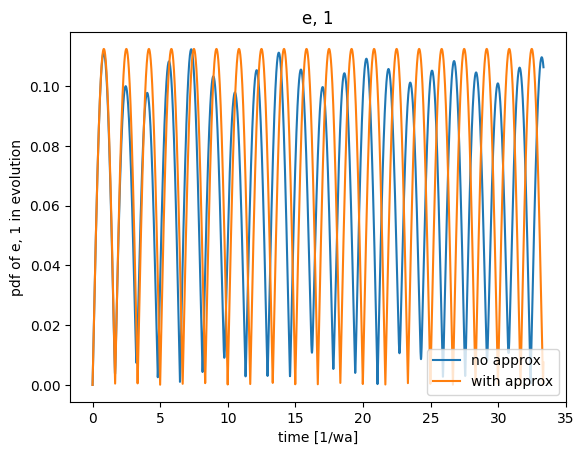

[np.complex128(1+0j), np.complex128(0.9999974990573162-4.772168926439418e-19j), np.complex128(0.9999899969120138+1.4380114990059984e-18j), np.complex128(0.9999774956146253-6.098557387277612e-19j), np.complex128(0.9999599985629287-3.350959317540827e-18j), np.complex128(0.999937510516226+3.617274648950526e-18j), np.complex128(0.9999100376338678+6.169631819866977e-18j), np.complex128(0.9998775873737149-1.5468431614897546e-18j), np.complex128(0.999840168603099-5.327012829854076e-18j), np.complex128(0.9997977914676185+3.57986978541963e-18j), np.complex128(0.9997504675233403+5.26039959299194e-18j), np.complex128(0.999698209608153-6.85732003129096e-18j), np.complex128(0.9996410319138107+2.5913508311907196e-18j), np.complex128(0.9995789499647058-1.1011061644033091e-17j), np.complex128(0.9995119805242587+1.2606881085193485e-17j), np.complex128(0.9994401418113887+1.2974445390059649e-17j), np.complex128(0.9993634531560354+1.3144170673488439e-17j), np.complex128(0.9992819352382524+4.58933339461805

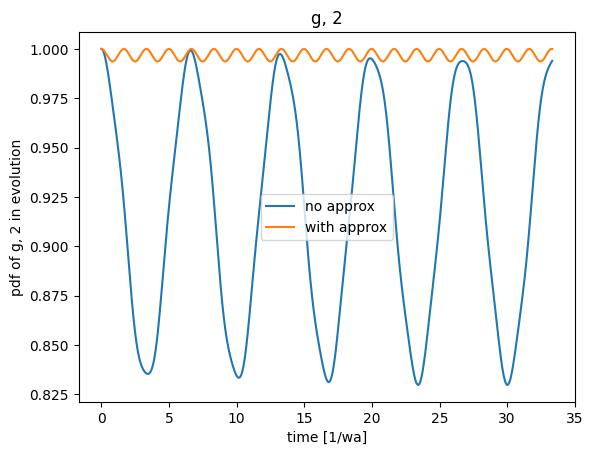

[np.complex128(0j), np.complex128(0.00173239255258249+1.1523345339171043e-21j), np.complex128(0.0034647586109428853+2.5431014863813264e-21j), np.complex128(0.005197071301740557+3.668344745099755e-21j), np.complex128(0.006929306088766525+2.3263221008918772e-20j), np.complex128(0.008661436967349435-4.348882986974973e-20j), np.complex128(0.010393434418701563-3.027549363961034e-20j), np.complex128(0.012125274620376767+7.101044557061097e-21j), np.complex128(0.013856929039051244+6.497927999937815e-20j), np.complex128(0.015588373759208895-2.0460893870702478e-20j), np.complex128(0.01731958060905865-2.4914544975582385e-20j), np.complex128(0.019050524422860024-3.5625509593110184e-20j), np.complex128(0.02078117866232869+1.177487895334041e-19j), np.complex128(0.02251151644615989+2.0810325959540512e-19j), np.complex128(0.024241513610110284-1.0721810757750415e-19j), np.complex128(0.025971140598954962+1.098741428450552e-19j), np.complex128(0.02770037417321101-9.602744952130451e-20j), np.complex128(0.

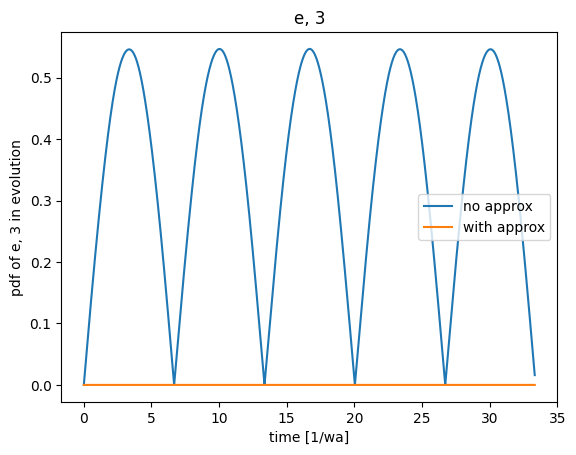

In [ ]:
tau = np.linspace(0, 50, 5000)

H_JC_P = Hamiltonian(1.5, 1, 0.2, 10, True).H_JC
H_JC = Hamiltonian(1.5, 1, 0.2, 10, False).H_JC
wa = Hamiltonian(1.5, 1, 0.2, 10, False).wa

psi0 = tensor(basis(10, 2), basis(2, 0))
# psi0 = H_JC.eigenstates()[1][1]

# Perform unitary evolution
resultP = mesolve(H_JC_P, psi0, tau)
result = mesolve(H_JC, psi0, tau)

g = tensor(basis(5, 2), basis(2, 0))
e = tensor(basis(5, 1), basis(2, 1))
extra = tensor(basis(5, 3), basis(2, 1))

# Access the results
statesP = resultP.states
states = result.states
# print(statesP[1])
# Visualize the results
expect_z = [np.sqrt((statesP[i].overlap(e))*np.conjugate(statesP[i].overlap(e))) for i in range(len(tau))]
expect_2 = [np.sqrt((states[i].overlap(e))*np.conjugate(states[i].overlap(e))) for i in range(len(tau))]
print(expect_z)
plt.plot(tau/wa, expect_z, label = 'no approx')
plt.plot(tau/wa, expect_2, label = 'with approx')
plt.legend()
plt.xlabel('time [1/wa]')
plt.ylabel('pdf of e, 1 in evolution')
plt.title('e, 1')
# plt.ylim(0.9, 1.01)
plt.show()

expect_z = [np.sqrt((statesP[i].overlap(g))*np.conjugate(statesP[i].overlap(g))) for i in range(len(tau))]
expect_2 = [np.sqrt((states[i].overlap(g))*np.conjugate(states[i].overlap(g))) for i in range(len(tau))]
print(expect_z)
plt.plot(tau/wa, expect_z, label = 'no approx')
plt.plot(tau/wa, expect_2, label = 'with approx')
plt.legend()
plt.xlabel('time [1/wa]')
plt.ylabel('pdf of g, 2 in evolution')
plt.title('g, 2')
# plt.ylim(0, 0.15)
plt.show()

expect_z = [np.sqrt((statesP[i].overlap(extra))*np.conjugate(statesP[i].overlap(extra))) for i in range(len(tau))]
expect_2 = [np.sqrt((states[i].overlap(extra))*np.conjugate(states[i].overlap(extra))) for i in range(len(tau))]
print(expect_z)
plt.plot(tau/wa, expect_z, label = 'no approx')
plt.plot(tau/wa, expect_2, label = 'with approx')
plt.legend()
plt.xlabel('time [1/wa]')
plt.ylabel('pdf of e, 3 in evolution')
plt.title('e, 3')
# plt.ylim(0, 0.15)
plt.show()

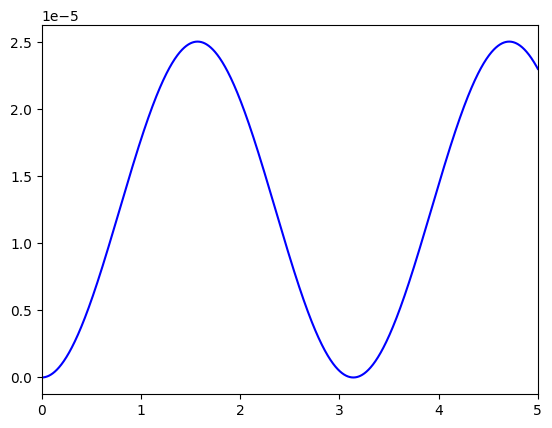

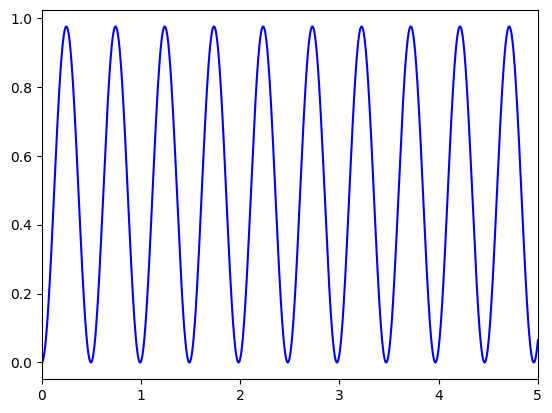

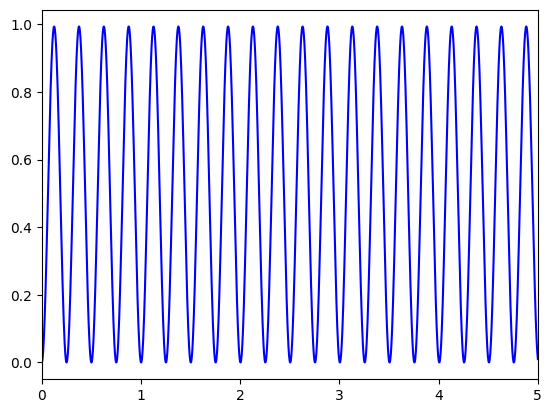

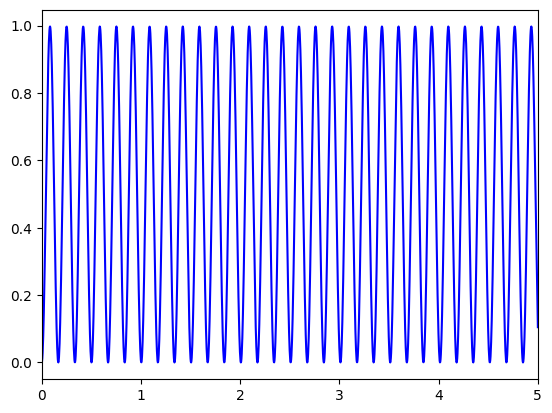

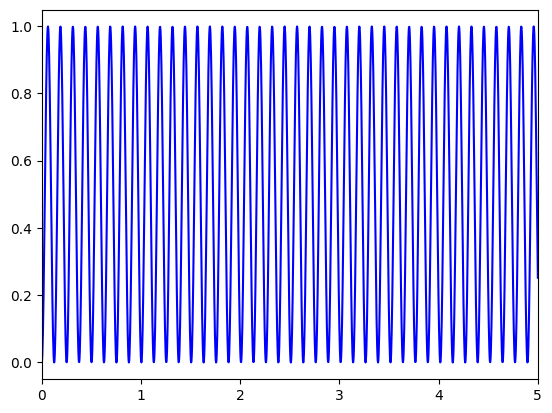

In [ ]:
import scipy.fft as ft

freqP = []
freq = []
Peaks = []
om = np.linspace(0.01, 50, 5)

def peak_find (P, t):
    t_peak = []
    for i in range(len(t)-2):
        if P[i+1]>P[i] and P[i+1]>P[i+2]:
            t_peak.append(t[i+1])
            continue
    return t_peak
            
N = 5

for i in om:

    tau = np.linspace(0, 30, 10000)

    H_JC_P = Hamiltonian(1, 1, i, N, True).H_JC
    H_JC = Hamiltonian(1, 1, i, N, False).H_JC
    # print(H_JC)
    # print(H_JC_P == H_JC)
    wa = Hamiltonian(1, 1, i, N, False).wa

    psi0 = tensor(basis(N, 1), basis(2, 0)) #g_1
    
    # psi0 = H_JC.eigenstates()[1][1]

    # Perform unitary evolution
    resultP = mesolve(H_JC_P, psi0, tau)
    result = mesolve(H_JC, psi0, tau)

    g = tensor(basis(N, 1), basis(2, 0))
    e = tensor(basis(N, 0), basis(2, 1))
    e_2 = tensor(basis(N, 2), basis(2, 1))
    # print(e)
    # extra = tensor(basis(5, 3), basis(2, 1))

    # Access the results
    statesP = resultP.states
    states = result.states

    # print(statesP == states)


    expect_z = np.array([np.sqrt((statesP[i].overlap(e_2))*np.conjugate(statesP[i].overlap(e_2))) for i in range(len(tau))])
    expect_2 = np.array([np.sqrt((states[i].overlap(e))*np.conjugate(states[i].overlap(e))) for i in range(len(tau))])

    ###############################
    # time, z = tau, expect_z**2

    # T_peak = peak_find(z, time)
    # # print(T_peak)
    # f = 1/np.average([T_peak[i+1]-T_peak[i] for i in range(len(T_peak)-1)])
    # # print(z)

    ###############################



    # N = len(time)
    # yf1 = ft.fft(z)
    # xf1 = ft.fftfreq(N)
    # xx1=xf1[int(len(xf1)/2+1):len(xf1)]
    # distance = time[1:]-time[:-1] 
    # repx1=distance.mean()/xx1

    # plt.plot(time, np.abs(z))
    # plt.vlines(T_peak, 0, 1, lw = 1)
    # plt.show()

    # f, I = abs(repx1), abs(yf1[int(len(xf1)/2+1):len(xf1)])

    # yf = abs(yf1[int(len(xf1)/2+1):len(xf1)])

    # freqP.append(f)
    # plt.plot(time, z, 'r-')
    # plt.vlines(T_peak, 0, 1, lw = 1, color = 'red')




    time, z = tau, np.abs(expect_2)**2
    T_peak = peak_find(z, time)
    plt.plot(time, z, 'b-')
    # plt.vlines(T_peak, 0, 1, lw = 1, color = 'blue')
    plt.xlim(0, 5)
    
    plt.show()



    
    # print(T_peak)
    f = 1/np.average([T_peak[i+1]-T_peak[i] for i in range(len(T_peak)-1)])

    # N = len(time)
    # yf1 = ft.fft(z)
    # xf1 = ft.fftfreq(N)
    # xx1=xf1[int(len(xf1)/2+1):len(xf1)]
    # distance = time[1:]-time[:-1] 
    # repx1=distance.mean()/xx1

    # f, I = abs(repx1), abs(yf1[int(len(xf1)/2+1):len(xf1)])

    # yf = abs(yf1[int(len(xf1)/2+1):len(xf1)])

    freq.append(f)
    Peaks.append(np.max(z))


    # plt.plot(f, np.abs(I))
    # plt.show()
    # plt.plot(time, np.abs(z))
    # plt.show()

-1


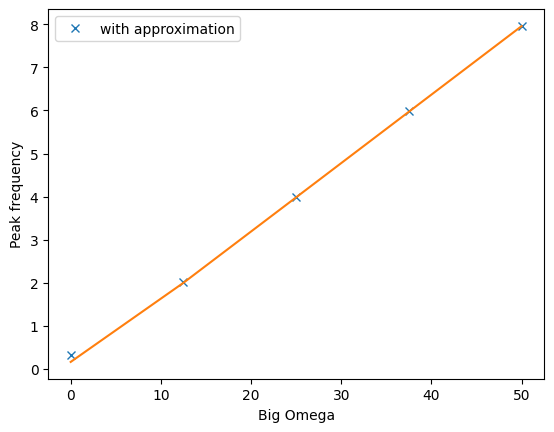

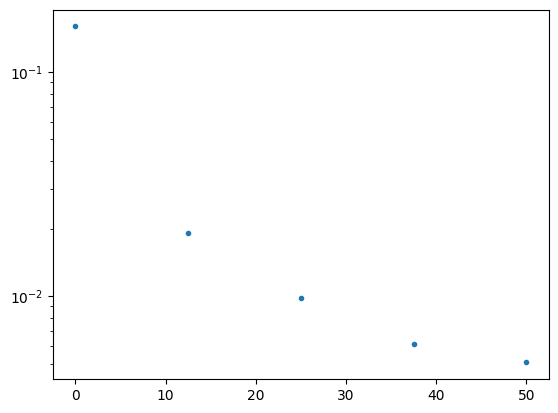

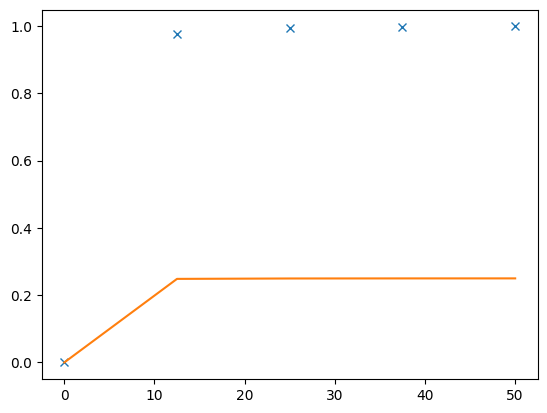

In [ ]:
d = Hamiltonian(1, 2, i, 10, False).wa - Hamiltonian(1, 2, i, 10, False).wc
print(d) 
w_ana = np.sqrt(d**2 + (om)**2)/(2*np.pi) 
# print(w_ana)
# plt.plot(om, freqP, '.', label = 'without approximation')
plt.plot(om, np.array(freq), 'x', label = 'with approximation')
plt.plot(om, w_ana)
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Big Omega')
plt.ylabel('Peak frequency')
plt.legend()
plt.show()

plt.plot(om, np.abs(w_ana - np.array(freq)), '.')
# plt.xscale('log')
plt.yscale('log')
plt.show()


F_ana = (2*om/(4*np.sqrt(d**2 + om**2)))**2
plt.plot(om, np.array(Peaks), 'x')
plt.plot(om, F_ana)
plt.show()

In [ ]:
import numpy as np

N=2
times = np.linspace(0.0, 50.0, 10000)
psi0 = tensor(fock(N, 1), fock(2,0) )
a = tensor(destroy(N),qeye(2))
sm = tensor(qeye(N),destroy(2))
sigma_z = tensor(qeye(N),sigmaz())


wc= 0.5
wa= 10
d = wa-wc

c_0_evlt=[]
c_1_evlt=[]
Omega_vals=[]
k1_vals = []
k2_vals =[]
wiki_vals = []
wiki_vals2=[]

for i in range(-50,50):
    Omega = i
    # print(i)
    Omega_vals.append(i)
# decoupled Hamiltonian
    H0 = wc * a.dag() * a + wa/2 * sigma_z
# interaction Hamiltonian
    #H1 = Omega/2 * (a.dag() + a) * (sm + sm.dag()) 
    H1 = Omega/2 * ((a.dag() * sm) + (sm.dag()*a)) #truncation / approximation
    H = H0 + H1
    
  #  solver = SESolver(H)
   # result = solver.run(psi0, times, e_ops=[sigmaz()])

# Find the eigenstates of the Hamiltonian
   # evals, evecs = H.eigenstates()
# Time evolution
    result = sesolve(H, psi0, times, [])
    
    
    # Extract expectation values for photon number (a.dag() * a) and atomic excitation (sm.dag() * sm)
    cavity_expect = expect(a.dag() * a, result.states)
    atom_expect = expect(sm.dag() * sm, result.states)


# Plot the expectation values
plt.figure()
plt.plot(times, cavity_expect, label="Cavity Photon Number")
plt.plot(times, atom_expect, label="Atomic Excitation Probability")
plt.xlabel('Time')
plt.ylabel('Expectation Value')
plt.legend()
plt.show()
    
    
    
    
# Check higher eigenstates
   # num_eigenstates = 4
    #c = [[] for _ in range(num_eigenstates)]

    #for state in result.states:
     #   for i in range(num_eigenstates):
        #c[i].append(evecs[i].overlap(state).real)
        
      #      c[i].append(evecs[i].dag() * state) 
      
    #for i in range(num_eigenstates):
    #    c[i].append(evecs[i].overlap(psi0))
        #exp=[(evecs[i].overlap(psi0))*np.conjugate(evecs[i].overlap(psi0))]
        #c[i].append(exp)


# Visualize the results
 #   c_0_evlt.append(c[0])
  #  c_1_evlt.append(c[3])
   # print(c[0])

    c_0_evlt.append(np.abs(c[0][0])**2)
    c_1_evlt.append(np.abs(c[3][0])**2)
  
    analytical_k1 = (Omega**2/4 *1) / (d**2 / 2 + d *np.sqrt(d**2/4 + Omega **2/4 * 1) + 2 * Omega ** 2/4 *1 )
    analytical_k2 = (Omega**2/4 *1) / (d**2 / 2 - d *np.sqrt(d**2/4 + Omega **2/4 * 1) + 2 * Omega ** 2/4 *1 )
    k1_vals.append(analytical_k1)
    k2_vals.append(analytical_k2)
    wiki = np.sin((np.arctan(Omega*(np.sqrt(1))/d))/2)
    wiki_vals.append(wiki**2)
    wiki2 = np.cos((np.arctan(Omega*(np.sqrt(1))/d))/2)
    wiki_vals2.append(wiki2**2)
    
# mpl.rc("figure", figsize=(10, 8))
plt.figure()
#plt.plot(Omega_vals, c_0_evlt, label=f"|c{1}|^2", color ="red")
#plt.plot(Omega_vals, c_1_evlt, label=f"|c{2}|^2", color ="red")
plt.plot(Omega_vals, c_0_evlt, label="Numerical", color ="red")
plt.plot(Omega_vals, c_1_evlt, color ="red")
#plt.plot(Omega_vals, k1_vals, label=f"|k{1}|^2", color ="blue")
#plt.plot(Omega_vals, k2_vals, label=f"|k{2}|^2", color ="blue")
plt.plot(Omega_vals, k2_vals, label="Analytical", color ="blue")
plt.plot(Omega_vals, k1_vals, color ="blue")
#plt.plot(Omega_vals, wiki_vals, label ="wiki", color ="black")
#plt.plot(Omega_vals, wiki_vals2, label ="wiki", color ="black")
plt.plot(Omega_vals, wiki_vals, label ="Wiki", color ="black")
plt.plot(Omega_vals, wiki_vals2, color ="black")
plt.xlabel("Omega")
plt.ylabel("Probability of Wavefunctions")
plt.title("|c1|^2 & |c2|^2 vs Omega") #Note that these are the coefficients of psi0 and psi1 i.e. ground and excited states not the eigenstates!!
plt.legend()
plt.grid()
plt.show()

IndentationError: unexpected indent (3779016694.py, line 81)

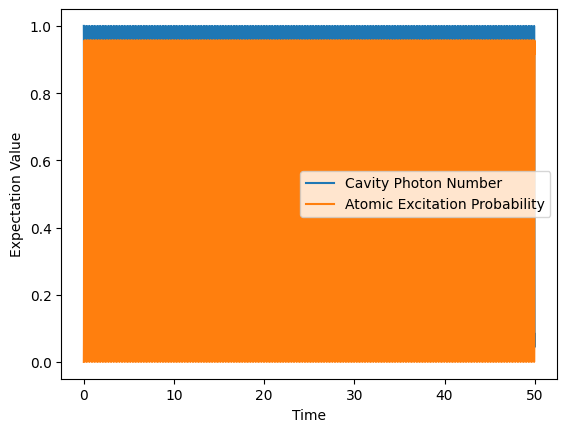

In [ ]:
import numpy as np

N=2
times = np.linspace(0.0, 50.0, 10000)
psi0 = tensor(fock(N, 1), fock(2,0) )
a = tensor(destroy(N),qeye(2))
sm = tensor(qeye(N),destroy(2))
sigma_z = tensor(qeye(N),sigmaz())


wc= 0.5
wa= 10
d = wa-wc


Omega = i

H0 = wc * a.dag() * a + wa/2 * sigma_z
# interaction Hamiltonian
    #H1 = Omega/2 * (a.dag() + a) * (sm + sm.dag()) 
H1 = Omega/2 * ((a.dag() * sm) + (sm.dag()*a)) #truncation / approximation
H = H0 + H1
    
  #  solver = SESolver(H)
   # result = solver.run(psi0, times, e_ops=[sigmaz()])

# Find the eigenstates of the Hamiltonian
   # evals, evecs = H.eigenstates()
# Time evolution
result = sesolve(H, psi0, times, [])
    
    
    # Extract expectation values for photon number (a.dag() * a) and atomic excitation (sm.dag() * sm)
cavity_expect = expect(a.dag() * a, result.states)
atom_expect = expect(sm.dag() * sm, result.states)




# Plot the expectation values
plt.figure()
plt.plot(times, cavity_expect, label="Cavity Photon Number")
plt.plot(times, atom_expect, label="Atomic Excitation Probability")
plt.xlabel('Time')
plt.ylabel('Expectation Value')
plt.legend()
plt.show()

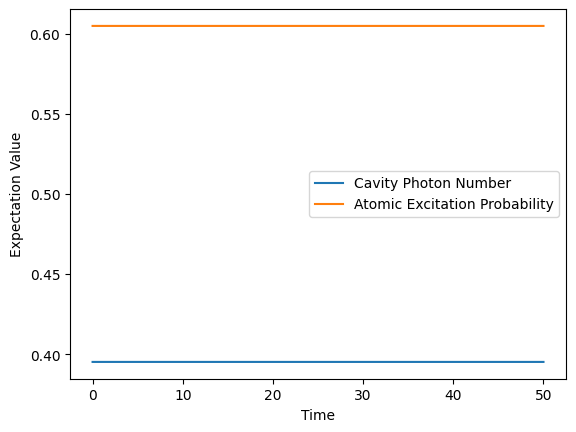

In [ ]:
# Check higher eigenstates
num_eigenstates = 4
c = [[] for _ in range(num_eigenstates)]

for state in result.states:
  for i in range(num_eigenstates):
    c[i].append(evecs[i].overlap(psi0).real*np.conjugate(evecs[i].overlap(psi0)))
        
      #      c[i].append(evecs[i].dag() * state) 
      
    #for i in range(num_eigenstates):
    #    c[i].append(evecs[i].overlap(psi0))
        #exp=[(evecs[i].overlap(psi0))*np.conjugate(evecs[i].overlap(psi0))]
        #c[i].append(exp)


# Plot the expectation values
plt.figure()
plt.plot(times, c[0], label="Cavity Photon Number")
plt.plot(times, c[3], label="Atomic Excitation Probability")
plt.xlabel('Time')
plt.ylabel('Expectation Value')
plt.legend()
plt.show()

/var/folders/f7/bgyj513d5qj_1w7dm650_8cc0000gn/T/ipykernel_58193/717419279.py:73: RuntimeWarning: invalid value encountered in scalar divide
  analytical_k2 = (Omega**2/4 *1) / (d**2 / 2 - d *np.sqrt(d**2/4 + Omega **2/4 * 1) + 2 * Omega ** 2/4 *1 )


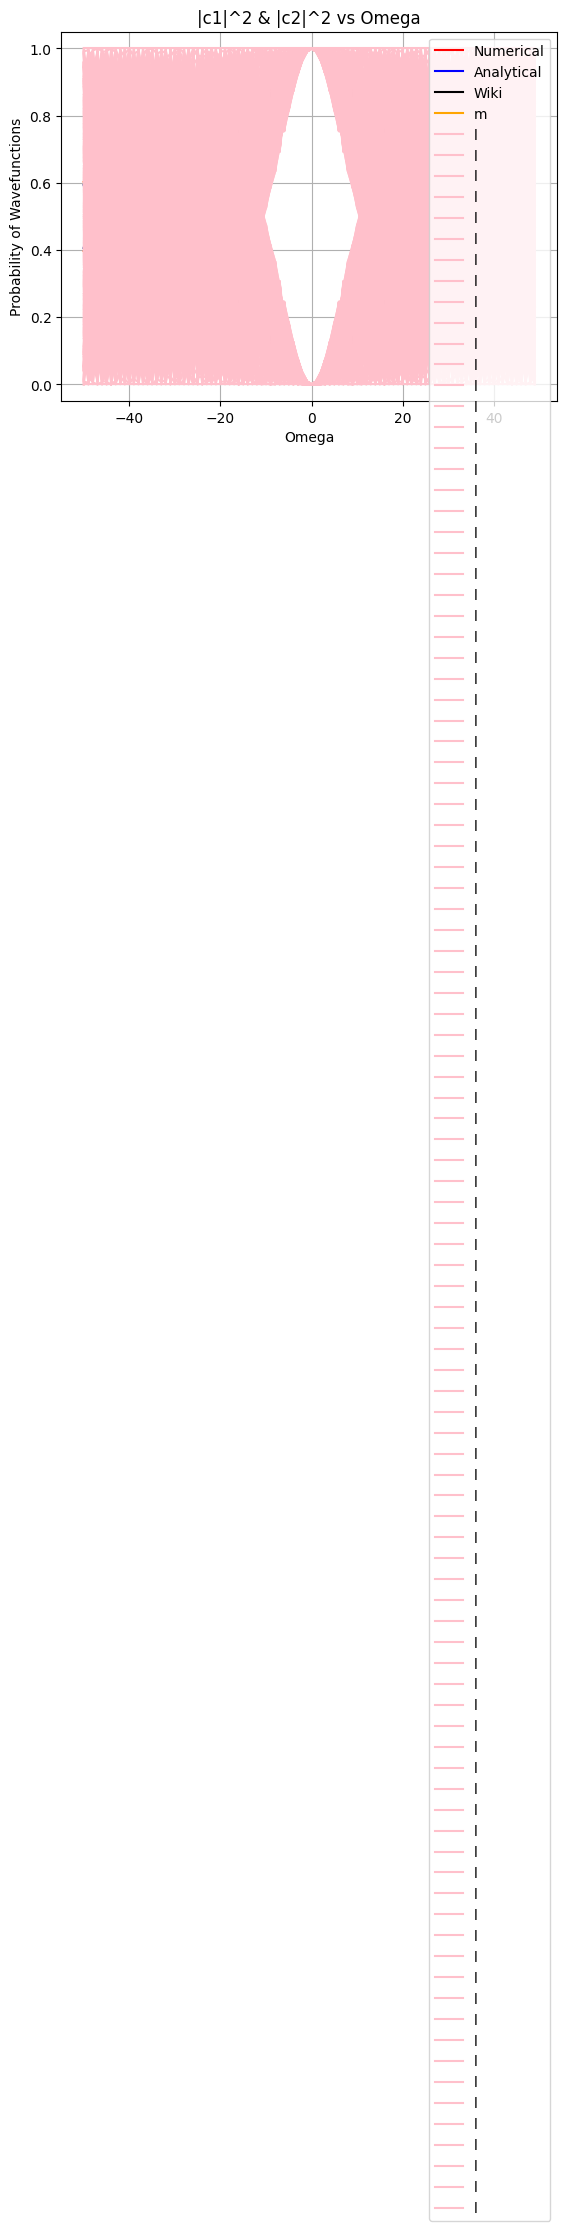

In [ ]:
import numpy as np

N=2
times = np.linspace(0.0, 10.0, 100)
psi0 = tensor(fock(N, 1), fock(2,0) )
a = tensor(destroy(N),qeye(2))
sm = tensor(qeye(N),destroy(2))
sigma_z = tensor(qeye(N),sigmaz())


wc= 0.5
wa= 10
d = wa-wc

c_0_evlt=[]
c_1_evlt=[]
Omega_vals=[]
k1_vals = []
k2_vals =[]
wiki_vals = []
wiki_vals2=[]
m1=[]
m2=[]

l1=[]
l2=[]

for i in range(-50,50):
    Omega = i
    # print(i)
    Omega_vals.append(i)
# decoupled Hamiltonian
    H0 = wc * a.dag() * a + wa/2 * sigma_z
# interaction Hamiltonian
    #H1 = Omega/2 * (a.dag() + a) * (sm + sm.dag()) 
    H1 = Omega/2 * ((a.dag() * sm) + (sm.dag()*a)) #truncation / approximation
    H = H0 + H1
    

# Find the eigenstates of the Hamiltonian
    evals, evecs = H.eigenstates()
# Time evolution
    result = sesolve(H, psi0, times, [])
    
    
    cavity_expect = expect(a.dag() * a, result.states)
    atom_expect = expect(sm.dag() * sm, result.states)
    l1.append(cavity_expect)
    l2.append(atom_expect)
    
    
    num_eigenstates = 4
    m = [[] for _ in range(num_eigenstates)]

    for state in result.states:
        for i in range(num_eigenstates):
            m[i].append(evecs[i].overlap(state).real) 
    m1.append(np.abs(m[0][0])**2)
    m2.append(np.abs(m[3][0])**2)
      
        
    
# Check higher eigenstates
    num_eigenstates = 4
    c = [[] for _ in range(num_eigenstates)]
    for i in range(num_eigenstates):
        c[i].append(evecs[i].overlap(psi0))

    c_0_evlt.append(np.abs(c[0][0])**2)
    c_1_evlt.append(np.abs(c[3][0])**2)
  
    analytical_k1 = (Omega**2/4 *1) / (d**2 / 2 + d *np.sqrt(d**2/4 + Omega **2/4 * 1) + 2 * Omega ** 2/4 *1 )
    analytical_k2 = (Omega**2/4 *1) / (d**2 / 2 - d *np.sqrt(d**2/4 + Omega **2/4 * 1) + 2 * Omega ** 2/4 *1 )
    k1_vals.append(analytical_k1)
    k2_vals.append(analytical_k2)
    wiki = np.sin((np.arctan(Omega*(np.sqrt(1))/d))/2)
    wiki_vals.append(wiki**2)
    wiki2 = np.cos((np.arctan(Omega*(np.sqrt(1))/d))/2)
    wiki_vals2.append(wiki2**2)
    
# mpl.rc("figure", figsize=(10, 8))
plt.figure()
plt.plot(Omega_vals, c_0_evlt, label="Numerical", color ="red")
plt.plot(Omega_vals, c_1_evlt, color ="red")
plt.plot(Omega_vals, k2_vals, label="Analytical", color ="blue")
plt.plot(Omega_vals, k1_vals, color ="blue")
plt.plot(Omega_vals, wiki_vals, label ="Wiki", color ="black")
plt.plot(Omega_vals, wiki_vals2, color ="black")

plt.plot(Omega_vals, m1, label ="m", color ="orange")
plt.plot(Omega_vals, m2, color ="orange")

plt.plot(Omega_vals, l1, label ="l", color ="pink")
plt.plot(Omega_vals, l2, color ="pink")

plt.xlabel("Omega")
plt.ylabel("Probability of Wavefunctions")
plt.title("|c1|^2 & |c2|^2 vs Omega") #Note that these are the coefficients of psi0 and psi1 i.e. ground and excited states not the eigenstates!!
plt.legend()
plt.grid()
plt.show()

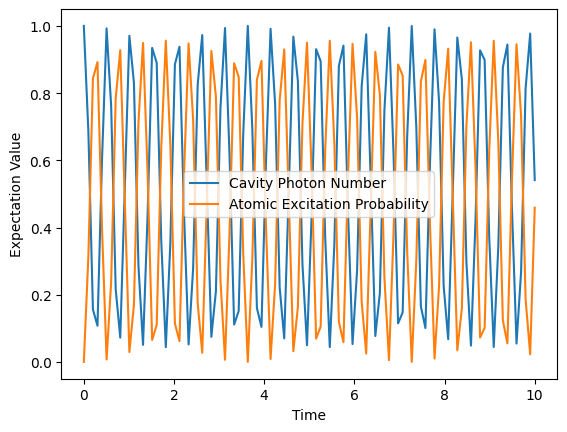

In [ ]:
    # Extract expectation values for photon number (a.dag() * a) and atomic excitation (sm.dag() * sm)
    cavity_expect = expect(a.dag() * a, result.states)
    atom_expect = expect(sm.dag() * sm, result.states)


# Plot the expectation values
plt.figure()
plt.plot(times, cavity_expect, label="Cavity Photon Number")
plt.plot(times, atom_expect, label="Atomic Excitation Probability")
plt.xlabel('Time')
plt.ylabel('Expectation Value')
plt.legend()
plt.show()

/var/folders/f7/bgyj513d5qj_1w7dm650_8cc0000gn/T/ipykernel_58193/1764811593.py:66: RuntimeWarning: invalid value encountered in scalar divide
  analytical_k2 = (Omega**2 / 4) / (d**2 / 2 - d * np.sqrt(d**2 / 4 + Omega**2 / 4) + 2 * Omega**2 / 4)


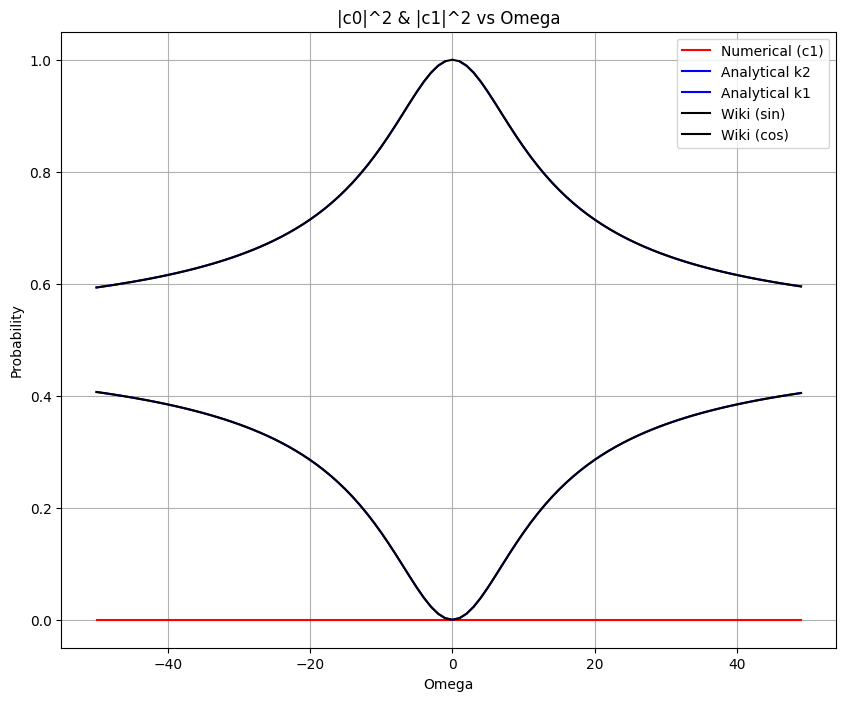

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Define the system size and parameters
N = 2
times = np.linspace(0.0, 20.0, 100)
psi0 = tensor(fock(N, 0), fock(2,0) )
psi1 = tensor(fock(N, 1), fock(2,1) )
#psi0 = tensor(fock(N, 1), fock(2, 0))  # Initial state: atom in ground state, 1 photon in the cavity
a = tensor(destroy(N), qeye(2))  # Cavity annihilation operator
sm = tensor(qeye(N), destroy(2))  # Atom lowering operator
sigma_z = tensor(qeye(N), -sigmaz())  # Atom z operator

wc = 0.5  # Cavity frequency
wa = 10   # Atom frequency
d = wa - wc  # Detuning

# Lists to store results for plotting
c_0_evlt = []
c_1_evlt = []
Omega_vals = []
k1_vals = []
k2_vals = []
wiki_vals = []
wiki_vals2 = []
m1 = []
m2 = []
l1 = []
l2 = []

# Loop over Omega values
for i in range(-50, 50):
    Omega = i
    Omega_vals.append(i)

    # Define Hamiltonian
    H0 = wc * a.dag() * a + wa / 2 * sigma_z
    H1 = Omega / 2 * (a.dag() * sm + sm.dag() * a)  # Interaction Hamiltonian
    H = H0 + H1
    
    # Find the eigenstates of the Hamiltonian
    evals, evecs = H.eigenstates()

    # Time evolution
    result = sesolve(H, psi0, times, [])
    
    # Expectation values
    cavity_expect = expect(a.dag() * a, result.states)  # Photon number
    atom_expect = expect(sm.dag() * sm, result.states)  # Atomic excitation
    l1.append(np.average(cavity_expect))
    l2.append(np.average(atom_expect))

    # Project onto eigenstates
    num_eigenstates = 4
    m = [[] for _ in range(num_eigenstates)]
    for state in result.states:
        for i in range(num_eigenstates):
            m[i].append(evecs[i].overlap(state).real)

    m1.append(np.abs(m[0][0])**2)  # Probability of ground state (0th eigenstate)
    m2.append(np.abs(m[3][0])**2)  # Probability of excited state (3rd eigenstate)
    
    # Analytical expressions for k1 and k2
    analytical_k1 = (Omega**2 / 4) / (d**2 / 2 + d * np.sqrt(d**2 / 4 + Omega**2 / 4) + 2 * Omega**2 / 4)
    analytical_k2 = (Omega**2 / 4) / (d**2 / 2 - d * np.sqrt(d**2 / 4 + Omega**2 / 4) + 2 * Omega**2 / 4)
    k1_vals.append(analytical_k1)
    k2_vals.append(analytical_k2)
    
    # Wiki-like expressions
    wiki = np.sin(np.arctan(Omega * np.sqrt(1) / d) / 2)
    wiki_vals.append(wiki**2)
    wiki2 = np.cos(np.arctan(Omega * np.sqrt(1) / d) / 2)
    wiki_vals2.append(wiki2**2)
    
    # Projections onto ground and excited states (using overlap)
    c = [[] for _ in range(num_eigenstates)]
    for i in range(num_eigenstates):
        c[i].append(evecs[i].overlap(psi0))  # Projection onto eigenstates

    c_0_evlt.append(np.abs(c[0][0])**2)  # Ground state probability
    c_1_evlt.append(np.abs(c[3][0])**2)  # Excited state probability

# Plot the results
plt.figure(figsize=(10, 8))
#plt.plot(Omega_vals, c_0_evlt, label="Numerical (c0)", color="red")
plt.plot(Omega_vals, c_1_evlt, label="Numerical (c1)", color="red")
plt.plot(Omega_vals, k2_vals, label="Analytical k2", color="blue")
plt.plot(Omega_vals, k1_vals, label="Analytical k1", color="blue")
plt.plot(Omega_vals, wiki_vals, label="Wiki (sin)", color="black")
plt.plot(Omega_vals, wiki_vals2, label="Wiki (cos)", color="black")
#plt.plot(Omega_vals, m1, label="m1 (0th eigenstate)", color="orange")
#plt.plot(Omega_vals, m2, label="m2 (3rd eigenstate)", color="orange")
#plt.plot(Omega_vals, l1, label="l1 (cavity expect)", color="pink")
#plt.plot(Omega_vals, l2, label="l2 (atom expect)", color="pink")

plt.xlabel("Omega")
plt.ylabel("Probability")
plt.title("|c0|^2 & |c1|^2 vs Omega")
plt.legend()
plt.grid(True)
plt.show()


/Users/dogasolmaz/Library/Python/3.9/lib/python/site-packages/matplotlib/collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


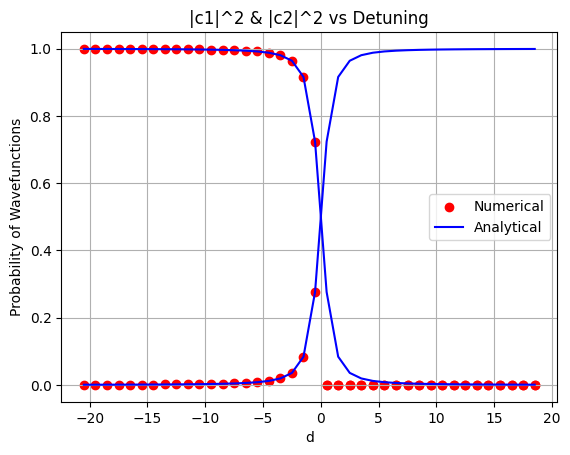

In [ ]:
import numpy as np

N=2
times = np.linspace(0.0, 20.0, 100)
psi0 = tensor(fock(N, 1), fock(2,0) )
psi1 = tensor(fock(N, 1), fock(2,1) )
a = tensor(destroy(N),qeye(2))
sm = tensor(qeye(N),destroy(2))
sigma_z = -tensor(qeye(N),sigmaz())


wc= 0.5
Omega=1

c_0_evlt=[]
c_1_evlt=[]
d_vals=[]
k1_vals = []
k2_vals =[]
wiki_vals = []
wiki_vals2=[]

for i in range(-20,20):
    wa = i
    d=wa-wc
    # print(i)
    d_vals.append(d)
# decoupled Hamiltonian
    H0 = wc * a.dag() * a + wa/2 * sigma_z
# interaction Hamiltonian
    #H1 = Omega/2 * (a.dag() + a) * (sm + sm.dag()) 
    
    H1 = Omega/2 * ((a.dag() * sm) + (sm.dag()*a)) #truncation / approximation
    #H=Hamiltonian(wa, wc, Omega, N, False).H_JC
    #H=Hamiltonian(10, 0.5, 2, 2, True).H_JC
    H = H0 + H1
    
# Find the eigenstates of the Hamiltonian
    evals, evecs = H.eigenstates()
# Time evolution
    result = sesolve(H, psi0, times)
# Check higher eigenstates
    num_eigenstates = 4
    c = [[] for _ in range(num_eigenstates)]

    #for state in result.states:
     #   for i in range(num_eigenstates):
        #c[i].append(evecs[i].overlap(state).real)
        
      #      c[i].append(evecs[i].dag() * state) 
      
    for i in range(num_eigenstates):
        c[i].append(evecs[i].overlap(psi0)*np.conjugate(evecs[i].overlap(psi0)))
        #exp=[(evecs[i].overlap(psi0))*np.conjugate(evecs[i].overlap(psi0))]
        #c[i].append(exp)


# Visualize the results
 #   c_0_evlt.append(c[0])
  #  c_1_evlt.append(c[3])
   # print(c[0])

    c_0_evlt.append(c[0])
    c_1_evlt.append(c[3])
  
    analytical_k1 = (Omega**2/4 *1) / (d**2 / 2 + d *np.sqrt(d**2/4 + Omega **2/4 * 1) + 2 * Omega ** 2/4 *1 )
    analytical_k2 = (Omega**2/4 *1) / (d**2 / 2 - d *np.sqrt(d**2/4 + Omega **2/4 * 1) + 2 * Omega ** 2/4 *1 )
    k1_vals.append(analytical_k1)
    k2_vals.append(analytical_k2)
    wiki = np.sin((np.arctan(Omega*(np.sqrt(1))/d))/2)
    wiki_vals.append(wiki**2)
    wiki2 = np.cos((np.arctan(Omega*(np.sqrt(1))/d))/2)
    wiki_vals2.append(wiki2**2)
    
# mpl.rc("figure", figsize=(10, 8))
plt.figure()
#plt.plot(Omega_vals, c_0_evlt, label=f"|c{1}|^2", color ="red")
#plt.plot(Omega_vals, c_1_evlt, label=f"|c{2}|^2", color ="red")

plt.scatter(d_vals, c_0_evlt, label="Numerical", color ="red")
plt.scatter(d_vals, c_1_evlt, color ="r")

#plt.plot(Omega_vals, k1_vals, label=f"|k{1}|^2", color ="blue")
#plt.plot(Omega_vals, k2_vals, label=f"|k{2}|^2", color ="blue")

plt.plot(d_vals, k2_vals, label="Analytical", color ="blue")
plt.plot(d_vals, k1_vals, color ="blue")

#plt.scatter(d_vals, wiki_vals, label ="wiki", color ="black")
#plt.scatter(d_vals, wiki_vals2, label ="wiki", color ="black")
plt.xlabel("d")
plt.ylabel("Probability of Wavefunctions")
plt.title("|c1|^2 & |c2|^2 vs Detuning") #Note that these are the coefficients of psi0 and psi1 i.e. ground and excited states not the eigenstates!!
plt.legend()
plt.grid()
plt.show()



In [ ]:
import oqpy as oq

# Define parameters
omega_q = 1.0  # qubit frequency
omega_c = 1.0  # cavity frequency
g = 0.1        # coupling strength

# Define operators
a = oq.destroy(10)                 # Annihilation operator for the cavity mode (10-photon truncation)
sm = oq.sigmam()                   # Lowering operator for the qubit
sz = oq.sigmaz()                   # Pauli Z operator for the qubit

# Define JC Hamiltonian
H = (omega_q / 2) * sz + omega_c * a.dag() * a + g * (sm * a.dag() + sm.dag() * a)

# You can now use H for simulations, e.g., time evolution, energy spectrum, etc.


ModuleNotFoundError: No module named 'oqpy'

In [ ]:
!pip install oqpy

In [ ]:
import oqpy

ModuleNotFoundError: No module named 'oqpy'

/var/folders/f7/bgyj513d5qj_1w7dm650_8cc0000gn/T/ipykernel_54874/2079865189.py:66: RuntimeWarning: invalid value encountered in scalar divide
  analytical_k2 = (Omega**2/4 *1) / (d**2 / 2 - d *np.sqrt(d**2/4 + Omega **2/4 * 1) + 2 * Omega ** 2/4 *1 )


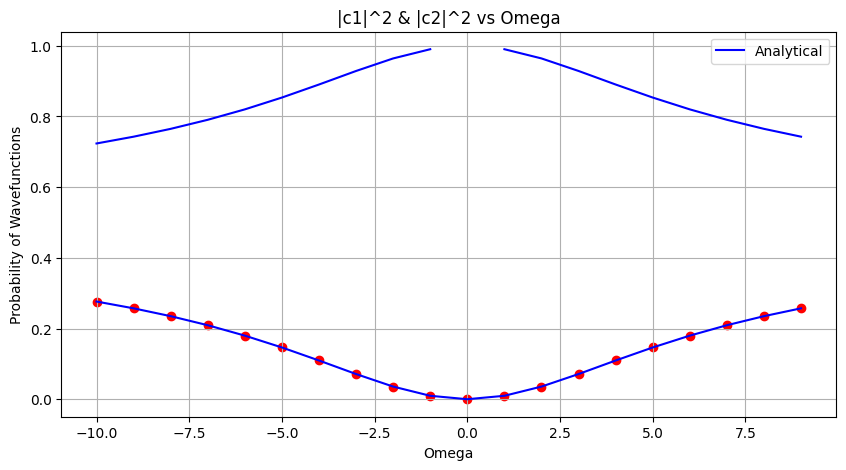

In [ ]:
import numpy as np

N=2
times = np.linspace(0.0, 20.0, 800)
psi0 = tensor(fock(N, 0), fock(2,1) )
psi1 = tensor(fock(N, 1), fock(2,1) )
a = tensor(destroy(N),qeye(2))
sm = tensor(qeye(N),destroy(2))
sigma_z = -tensor(qeye(N),sigmaz())


wc= 5
wa= 10
d = wa-wc

c_0_evlt=[]
c_1_evlt=[]
Omega_vals=[]
k1_vals = []
k2_vals =[]
wiki_vals = []
wiki_vals2=[]


for i in range(-10,10):
    Omega = i
    # print(i)
    Omega_vals.append(i)
# decoupled Hamiltonian
    H0 = wc * a.dag() * a + wa/2 * sigma_z
# interaction Hamiltonian
    #H1 = Omega/2 * (a.dag() + a) * (sm + sm.dag()) 
    
    H1 = Omega/2 * ((a.dag() * sm) + (sm.dag()*a)) #truncation / approximation
    #H=Hamiltonian(wa, wc, Omega, N, False).H_JC
    #H=Hamiltonian(10, 0.5, 2, 2, True).H_JC
    H = H0 + H1
    
# Find the eigenstates of the Hamiltonian
    evals, evecs = H.eigenstates()
# Time evolution
    result = sesolve(H, psi0, times)
# Check higher eigenstates
    num_eigenstates = 2*N
    c = [[] for _ in range(num_eigenstates)]

    #for state in result.states:
     #   for i in range(num_eigenstates):
        #c[i].append(evecs[i].overlap(state).real)
        
      #      c[i].append(evecs[i].dag() * state) 
      
    for i in range(num_eigenstates):
        c[i].append(evecs[i].overlap(psi0)*np.conjugate(evecs[i].overlap(psi0)))
        

    c_0_evlt.append(c[0])
        

    c_1_evlt.append(c[1])
    
    
    
  
    analytical_k1 = (Omega**2/4 *1) / (d**2 / 2 + d *np.sqrt(d**2/4 + Omega **2/4 * 1) + 2 * Omega ** 2/4 *1 )
    analytical_k2 = (Omega**2/4 *1) / (d**2 / 2 - d *np.sqrt(d**2/4 + Omega **2/4 * 1) + 2 * Omega ** 2/4 *1 )
    k1_vals.append(analytical_k1)
    k2_vals.append(analytical_k2)
    wiki = np.sin((np.arctan(Omega*(np.sqrt(1))/d))/2)
    wiki_vals.append(wiki**2)
    wiki2 = np.cos((np.arctan(Omega*(np.sqrt(1))/d))/2)
    wiki_vals2.append(wiki2**2)
    
# mpl.rc("figure", figsize=(10, 8))
plt.figure()
#plt.plot(Omega_vals, c_0_evlt, label=f"|c{1}|^2", color ="red")
#plt.plot(Omega_vals, c_1_evlt, label=f"|c{2}|^2", color ="red")

#plt.scatter(Omega_vals, c_0_evlt, label="Numerical", color ="red")
plt.scatter(Omega_vals, c_1_evlt, color ="red")

#plt.plot(Omega_vals, k1_vals, label=f"|k{1}|^2", color ="blue")
#plt.plot(Omega_vals, k2_vals, label=f"|k{2}|^2", color ="blue")

plt.plot(Omega_vals, k2_vals, label="Analytical", color ="blue")
plt.plot(Omega_vals, k1_vals, color ="blue")

#plt.plot(Omega_vals, wiki_vals, label ="wiki", color ="black")
#plt.plot(Omega_vals, wiki_vals2, label ="wiki", color ="black")
plt.xlabel("Omega")
plt.ylabel("Probability of Wavefunctions")
plt.title("|c1|^2 & |c2|^2 vs Omega") #Note that these are the coefficients of psi0 and psi1 i.e. ground and excited states not the eigenstates!!
plt.legend()
plt.grid()
plt.show()



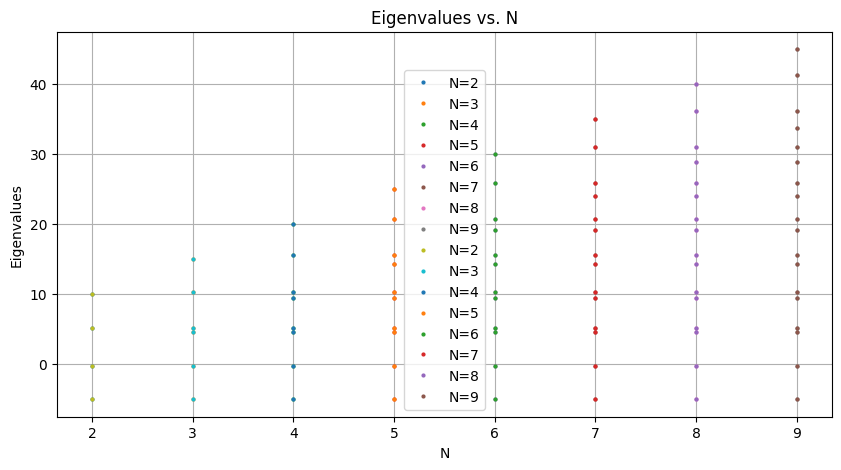

In [ ]:
wc= 5
wa= 10
d = wa-wc
Omega = 2

e_vals=[]
e_vals2=[]


for N in range(2,10):
    
    times = np.linspace(0.0, 20.0, 800)
    psi0 = tensor(fock(N, 0), fock(2,1) )
    psi1 = tensor(fock(N, 1), fock(2,1) )
    a = tensor(destroy(N),qeye(2))
    sm = tensor(qeye(N),destroy(2))
    sigma_z = -tensor(qeye(N),sigmaz())



    H0 = wc * a.dag() * a + wa/2 * sigma_z
    #H1 = Omega/2 * (a.dag() + a) * (sm + sm.dag()) 
    
    H1 = Omega/2 * ((a.dag() * sm) + (sm.dag()*a)) #truncation / approximation
    H = H0 + H1
    
    num_eigenstates = 2*N
    
# Find the eigenstates of the Hamiltonian
    evals, evecs = H.eigenstates()
# Time evolution
    result = sesolve(H, psi0, times)
# Check higher eigenstates

    e_vals.append(evals)

    evals2 = H.eigenenergies()
    e_vals2.append(evals2)


mpl.rc("figure", figsize=(10, 5))

# Plot the eigenvalues for each N value
for i, evals in enumerate(e_vals):

    plt.plot([i+2] * len(evals), evals, 'o', label=f'N={i+2}', markersize=2)  # Plot eigenvalues as dots for each N

for i, evals2 in enumerate(e_vals2):

    plt.plot([i+2] * len(evals2), evals2, 'o', label=f'N={i+2}', markersize=2)  # Plot eigenvalues as dots for each N

plt.xlabel("N")
plt.ylabel("Eigenvalues")
plt.title("Eigenvalues vs. N") #Note that these are the coefficients of psi0 and psi1 i.e. ground and excited states not the eigenstates!!
plt.legend()
plt.grid()
plt.show()
  

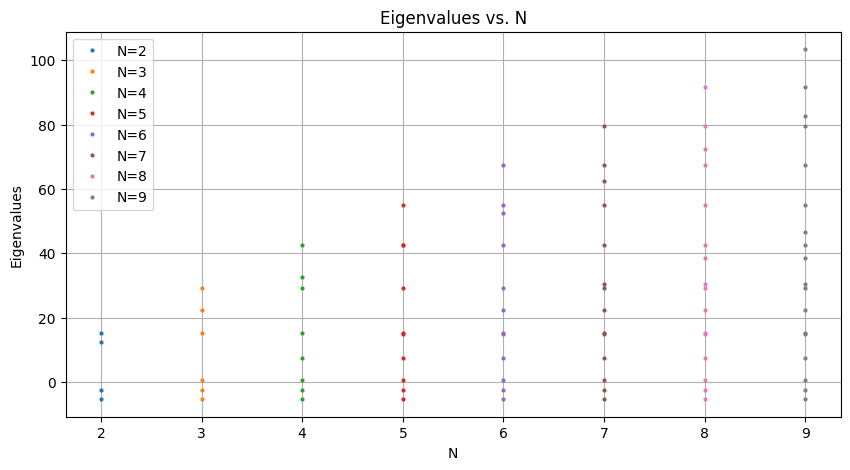

In [ ]:
wc= 10
wa= 5
d = wa-wc
Omega = 20

e_vals=[]
analytical_e1 =[]
analytical_e2 =[]


for N in range(2,10):
    
    times = np.linspace(0.0, 20.0, 800)
    psi0 = tensor(fock(N, 0), fock(2,1) )
    psi1 = tensor(fock(N, 1), fock(2,1) )
    a = tensor(destroy(N),qeye(2))
    sm = tensor(qeye(N),destroy(2))
    sigma_z = -tensor(qeye(N),sigmaz())



    H0 = wc * a.dag() * a + wa/2 * sigma_z
    #H1 = Omega/2 * (a.dag() + a) * (sm + sm.dag()) 
    
    H1 = Omega/2 * ((a.dag() * sm) + (sm.dag()*a)) #truncation / approximation
    H = H0 + H1
    
    num_eigenstates = 2*N
    
# Find the eigenstates of the Hamiltonian
    evals = H.eigenenergies()
# Time evolution
    result = sesolve(H, psi0, times)
# Check higher eigenstates

    e_vals.append(evals)

    n=N
    analytical_e1.append((n-1/2)*wc + np.sqrt((d/2)**2+n*((Omega/2)**2)))
    analytical_e2.append( (n-1/2)*wc - np.sqrt((d/2)**2+n*((Omega/2)**2)) )


mpl.rc("figure", figsize=(10, 5))

# Plot the eigenvalues for each N value
for i, evals in enumerate(e_vals):

    plt.plot([i+2] * len(evals), evals, 'o', label=f'N={i+2}', markersize=2)  # Plot eigenvalues as dots for each N
    
# Plot the analytical lines
#for y in analytical_e1:
 #   plt.axhline(y=y, color='gray', linestyle='--')  # Adjust line style and color as needed
#for y2 in analytical_e2:
 #   plt.axhline(y=y2, color='black', linestyle='--')  # Adjust line style and color as needed


plt.xlabel("N")
plt.ylabel("Eigenvalues")
plt.title("Eigenvalues vs. N") #Note that these are the coefficients of psi0 and psi1 i.e. ground and excited states not the eigenstates!!
plt.legend()
plt.grid()
plt.show()
  

/var/folders/f7/bgyj513d5qj_1w7dm650_8cc0000gn/T/ipykernel_1085/1639868703.py:74: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


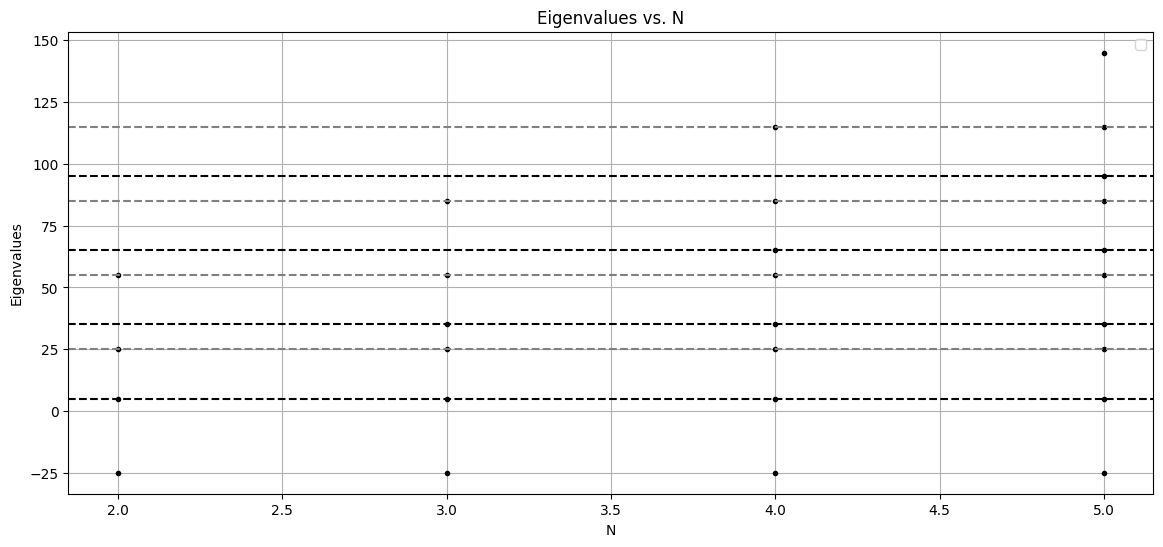

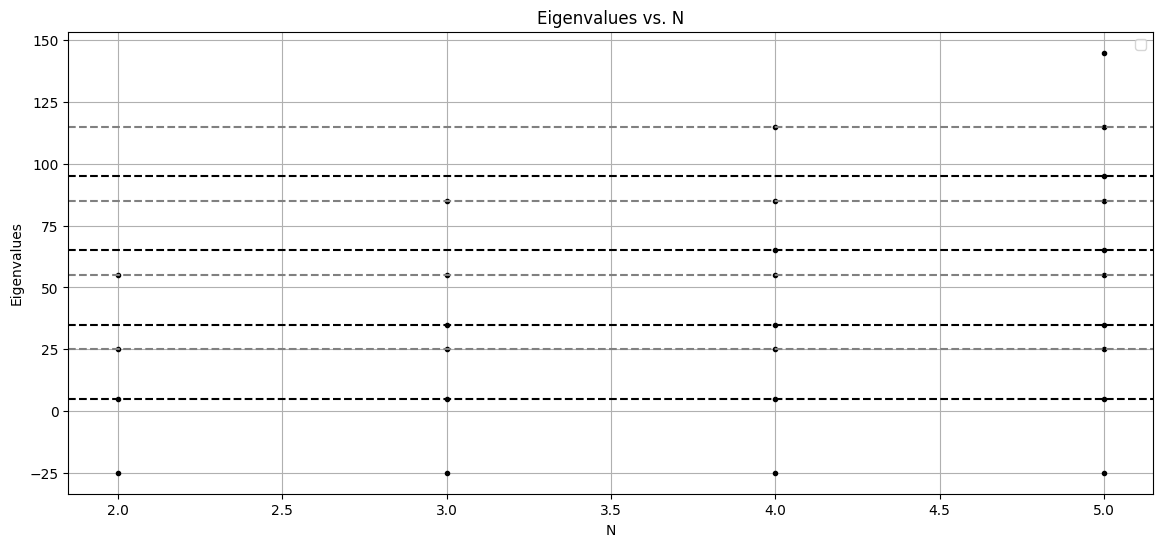

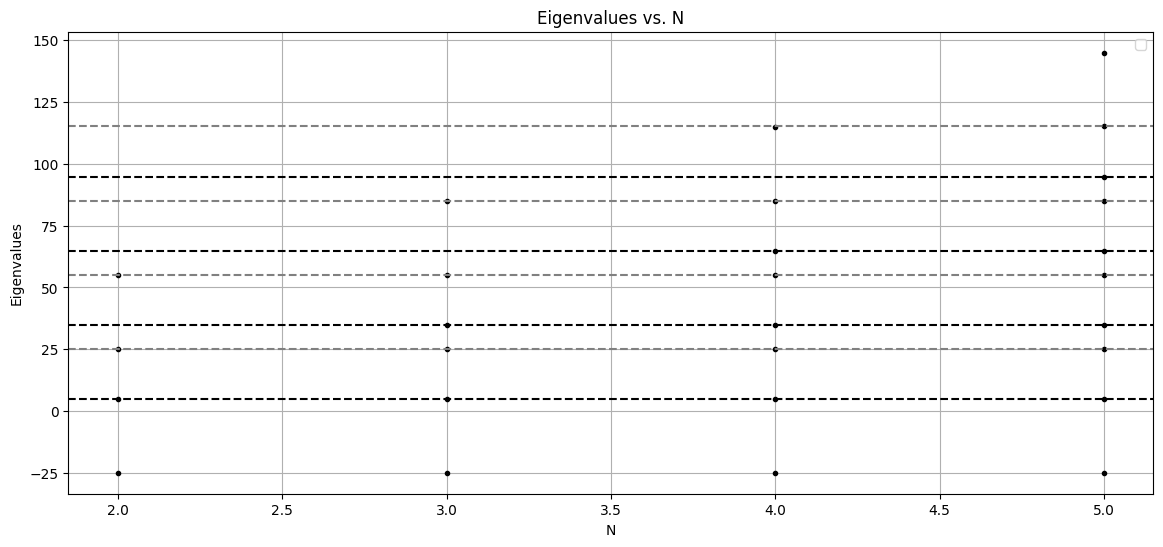

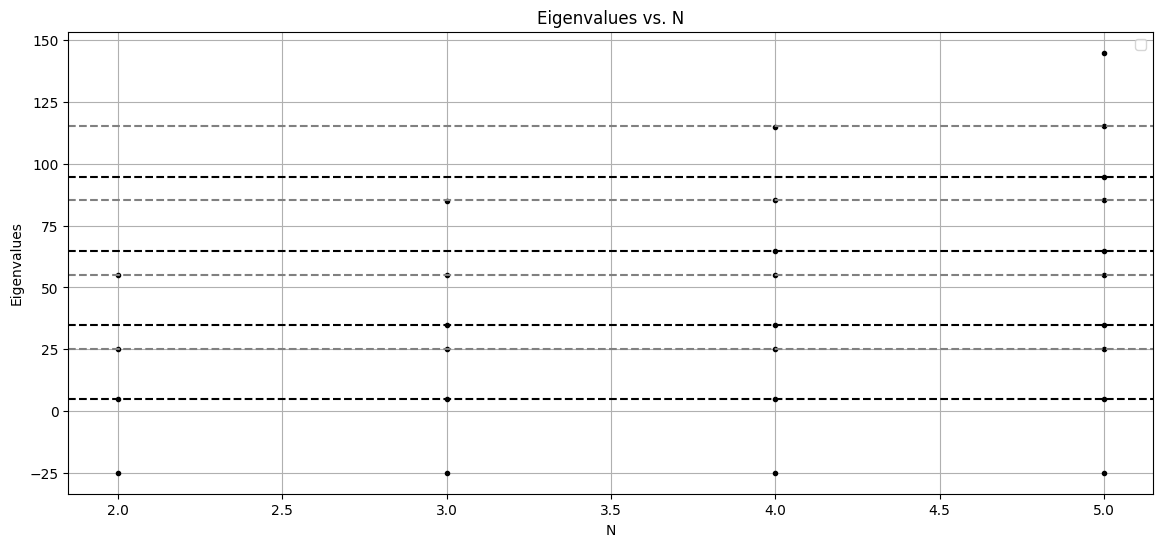

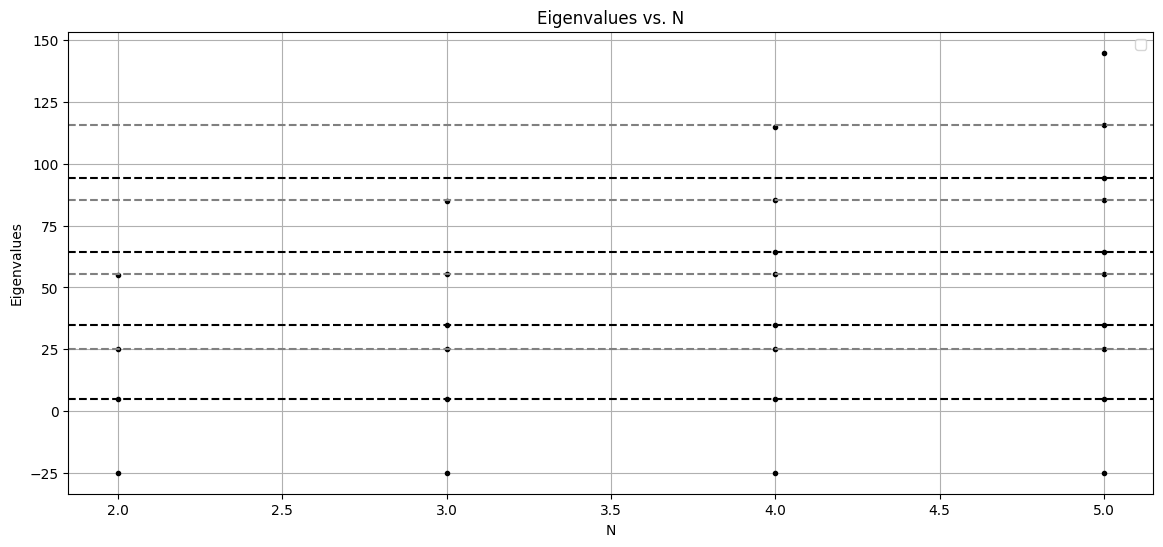

In [253]:
wc= 30
wa= 50
d = wa-wc
Omega_vals =[]




for i in range(0,5):
        
    Omega = i
    e_vals=[]
    analytical_e1 =[]
    analytical_e2 =[]

    for N in range(2,6):
    
        
        times = np.linspace(0.0, 20.0, 800)
        psi0 = tensor(fock(N, 0), fock(2,1) )
        psi1 = tensor(fock(N, 1), fock(2,1) )
        a = tensor(destroy(N),qeye(2))
        sm = tensor(qeye(N),destroy(2))
        sigma_z = -tensor(qeye(N),sigmaz())



        H0 = wc * a.dag() * a + wa/2 * sigma_z
        #H1 = Omega/2 * (a.dag() + a) * (sm + sm.dag()) 
        
        H1 = Omega/2 * ((a.dag() * sm) + (sm.dag()*a)) #truncation / approximation
        H = H0 + H1
        
        num_eigenstates = 2*N
    
    # Find the eigenstates of the Hamiltonian
        evals = H.eigenenergies()
    # Time evolution
        result = sesolve(H, psi0, times)
    # Check higher eigenstates

        e_vals.append(evals)

        n=N-1
        analytical_e1.append((n-1/2)*wc + np.sqrt((d/2)**2+n*((Omega/2)**2)))
        analytical_e2.append( (n-1/2)*wc - np.sqrt((d/2)**2+n*((Omega/2)**2)) )


    mpl.rc("figure", figsize=(14, 6))

    # Plot the eigenvalues for each N value
    for i, evals in enumerate(e_vals):

        plt.plot([i+2] * len(evals), evals, 'o', markersize=3,color="black")  # Plot eigenvalues as dots for each N
    
    # Plot the analytical lines
    for y in analytical_e1:
        plt.axhline(y=y, color='gray', linestyle='--')  # Adjust line style and color as needed
    for y2 in analytical_e2:
        plt.axhline(y=y2, color='black', linestyle='--')  # Adjust line style and color as needed
        


    #for y3 in [-25,5,25,35,55,65,85,95,115]:
     #   plt.axhline(y=y3, color='blue', linestyle='--')  # Adjust line style and color as needed
    
    #plt.axhline(y=-wa/2, color='r', linestyle='--')  # Adjust line style and color as needed
    


    plt.xlabel("N")
    plt.ylabel("Eigenvalues")
    plt.title("Eigenvalues vs. N") #Note that these are the coefficients of psi0 and psi1 i.e. ground and excited states not the eigenstates!!
    plt.legend()
    plt.grid()
    plt.show()
    

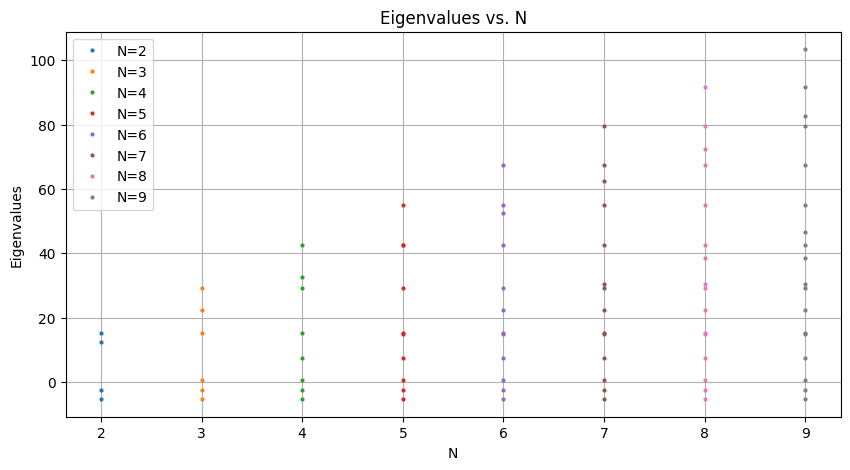

In [ ]:
wc= 10
wa= 5
d = wa-wc
Omega = 20

e_vals=[]
analytical_e1 =[]
analytical_e2 =[]


for N in range(2,10):
    
    times = np.linspace(0.0, 20.0, 800)
    psi0 = tensor(fock(N, 0), fock(2,1) )
    psi1 = tensor(fock(N, 1), fock(2,1) )
    a = tensor(destroy(N),qeye(2))
    sm = tensor(qeye(N),destroy(2))
    sigma_z = -tensor(qeye(N),sigmaz())



    H0 = wc * a.dag() * a + wa/2 * sigma_z
    #H1 = Omega/2 * (a.dag() + a) * (sm + sm.dag()) 
    
    H1 = Omega/2 * ((a.dag() * sm) + (sm.dag()*a)) #truncation / approximation
    H = H0 + H1
    
    num_eigenstates = 2*N
    
# Find the eigenstates of the Hamiltonian
    evals = H.eigenenergies()
# Check higher eigenstates

    e_vals.append(evals)

    n=N-1
    analytical_e1.append((n-1/2)*wc + np.sqrt((d/2)**2+n*((Omega/2)**2)))
    analytical_e2.append( (n-1/2)*wc - np.sqrt((d/2)**2+n*((Omega/2)**2)) )


mpl.rc("figure", figsize=(10, 5))

# Plot the eigenvalues for each N value
for i, evals in enumerate(e_vals):

    plt.plot([i+2] * len(evals), evals, 'o', label=f'N={i+2}', markersize=2)  # Plot eigenvalues as dots for each N
    
# Plot the analytical lines
#for y in analytical_e1:
 #   plt.axhline(y=y, color='gray', linestyle='--')  # Adjust line style and color as needed
#for y2 in analytical_e2:
 #   plt.axhline(y=y2, color='black', linestyle='--')  # Adjust line style and color as needed


plt.xlabel("N")
plt.ylabel("Eigenvalues")
plt.title("Eigenvalues vs. N") #Note that these are the coefficients of psi0 and psi1 i.e. ground and excited states not the eigenstates!!
plt.legend()
plt.grid()
plt.show()
  

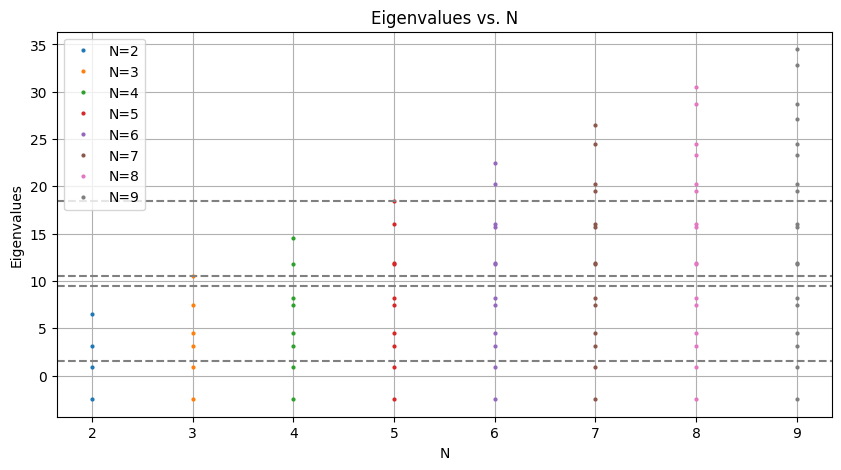

In [ ]:
wc= 4
wa= 5
d = wa-wc
Omega = 2

e_vals=[]
analytical_e1 =[]
analytical_e2 =[]


for N in range(2,10):
    
    times = np.linspace(0.0, 20.0, 800)
    psi0 = tensor(fock(N, 1), fock(2,1) )
    psi1 = tensor(fock(N, 1), fock(2,1) )
    a = tensor(destroy(N),qeye(2))
    sm = tensor(qeye(N),destroy(2))
    sigma_z = -tensor(qeye(N),sigmaz())



    H0 = wc * a.dag() * a + wa/2 * sigma_z
    #H1 = Omega/2 * (a.dag() + a) * (sm + sm.dag()) 
    
    H1 = Omega/2 * ((a.dag() * sm) + (sm.dag()*a)) #truncation / approximation
    H = H0 + H1
    
    num_eigenstates = 2*N
    
# Find the eigenstates of the Hamiltonian
    evals = H.eigenenergies()
# Check higher eigenstates

    e_vals.append(evals)

    n=N-1
    analytical_e1.append((n-1/2)*wc + np.sqrt((d/2)**2+n*((Omega/2)**2)))
    analytical_e2.append( (n-1/2)*wc - np.sqrt((d/2)**2+n*((Omega/2)**2)) )


mpl.rc("figure", figsize=(10, 5))

# Plot the eigenvalues for each N value
for i, evals in enumerate(e_vals):

    plt.plot([i+2] * len(evals), evals, 'o', label=f'N={i+2}', markersize=2)  # Plot eigenvalues as dots for each N
    
# Plot the analytical lines
#for y in analytical_e1:
 #   plt.axhline(y=y, color='gray', linestyle='--')  # Adjust line style and color as needed
#for y2 in analytical_e2:
 #   plt.axhline(y=y2, color='black', linestyle='--')  # Adjust line style and color as needed
 

plt.axhline(y=(wa/2+2*wc), color='gray', linestyle='--') 
plt.axhline(y=(-wa/2+wc), color='gray', linestyle='--') 
plt.axhline(y=(-wa/2+3*wc), color='gray', linestyle='--') 
plt.axhline(y=(wa/2+4*wc), color='gray', linestyle='--') 


plt.xlabel("N")
plt.ylabel("Eigenvalues")
plt.title("Eigenvalues vs. N") #Note that these are the coefficients of psi0 and psi1 i.e. ground and excited states not the eigenstates!!
plt.legend()
plt.grid()
plt.show()
  

25.85786437626905


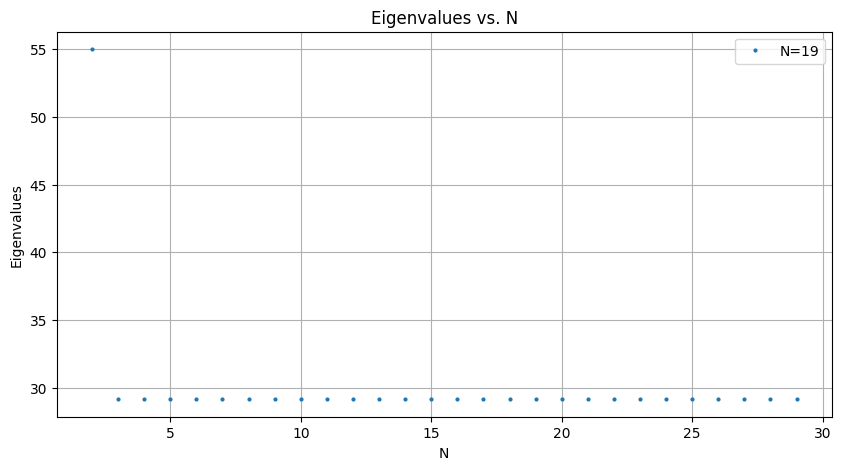

In [ ]:
wc= 30
wa= 50
d = wa-wc
Omega = 20

highest_lowest=[]
analytical_e1 =[]
analytical_e2 =[]

x=range(2,30)
for N in x:
    
    times = np.linspace(0.0, 20.0, 800)
    psi0 = tensor(fock(N, 0), fock(2,1) )
    psi1 = tensor(fock(N, 1), fock(2,1) )
    a = tensor(destroy(N),qeye(2))
    sm = tensor(qeye(N),destroy(2))
    sigma_z = -tensor(qeye(N),sigmaz())



    H0 = wc * a.dag() * a + wa/2 * sigma_z
    #H1 = Omega/2 * (a.dag() + a) * (sm + sm.dag()) 
    
    H1 = Omega/2 * ((a.dag() * sm) + (sm.dag()*a)) #truncation / approximation
    H = H0 + H1
    
    num_eigenstates = 2*N
    
# Find the eigenstates of the Hamiltonian
    evals = H.eigenenergies()
# Check higher eigenstates

    highest_lowest.append(evals[3])


    n=N-1 #2 photon states is big N, n ia the photons
    
    analytical_e1.append(wa/2+(n-1)*wc)
    analytical_e2.append(wa/2+(n-1)*wc )


mpl.rc("figure", figsize=(10, 5))

plt.plot(x, highest_lowest, 'o', label=f'N={i+2}', markersize=2) 

print(highest_lowest[0]-highest_lowest[1])

    
# Plot the analytical lines
#for y in analytical_e1:
 #   plt.axhline(y=y, color='gray', linestyle='--')  # Adjust line style and color as needed
#for y2 in analytical_e2:
 #   plt.axhline(y=y2, color='black', linestyle='--')  # Adjust line style and color as needed
 
plt.xlabel("N")
plt.ylabel("Eigenvalues")
plt.title("Eigenvalues vs. N") #Note that these are the coefficients of psi0 and psi1 i.e. ground and excited states not the eigenstates!!
plt.legend()
plt.grid()

plt.show()
  

In [ ]:
n=1
print(-np.sqrt((d/2)**2+n*((Omega/2)**2))+wa/2+wc/2)


25.85786437626905


/var/folders/f7/bgyj513d5qj_1w7dm650_8cc0000gn/T/ipykernel_1085/1255276217.py:12: RuntimeWarning: divide by zero encountered in divide
  new_unit.append(1/np.sqrt([i]))


[np.float64(0.0), np.float64(-7.113104083522614e-07), np.float64(-2.849658139680855e-06), np.float64(-6.42169565878703e-06), np.float64(-1.1434112822339415e-05), np.float64(-1.789363746329542e-05), np.float64(-2.5807035886504792e-05), np.float64(-3.5181113472670944e-05), np.float64(-4.6022715214810717e-05), np.float64(-5.833872632443615e-05), np.float64(-7.213607275557976e-05), np.float64(-8.742172185405295e-05), np.float64(-0.00010420268288413581), np.float64(-0.00012248600767073015), np.float64(-0.00014227879116956998), np.float64(-0.00016358817209916054), np.float64(-0.00018642133354829227), np.float64(-0.00021078550358488712), np.float64(-0.00023668795589237845), np.float64(-0.0002641360104216339), np.float64(-0.0002931370340220063), np.float64(-0.0003236984410603938), np.float64(-0.00035582769414421733), np.float64(-0.00038953230471072686), np.float64(-0.00042481983375886045), np.float64(-0.00046169789248695636), np.float64(-0.0005001741430112894), np.float64(-0.000540256299055741

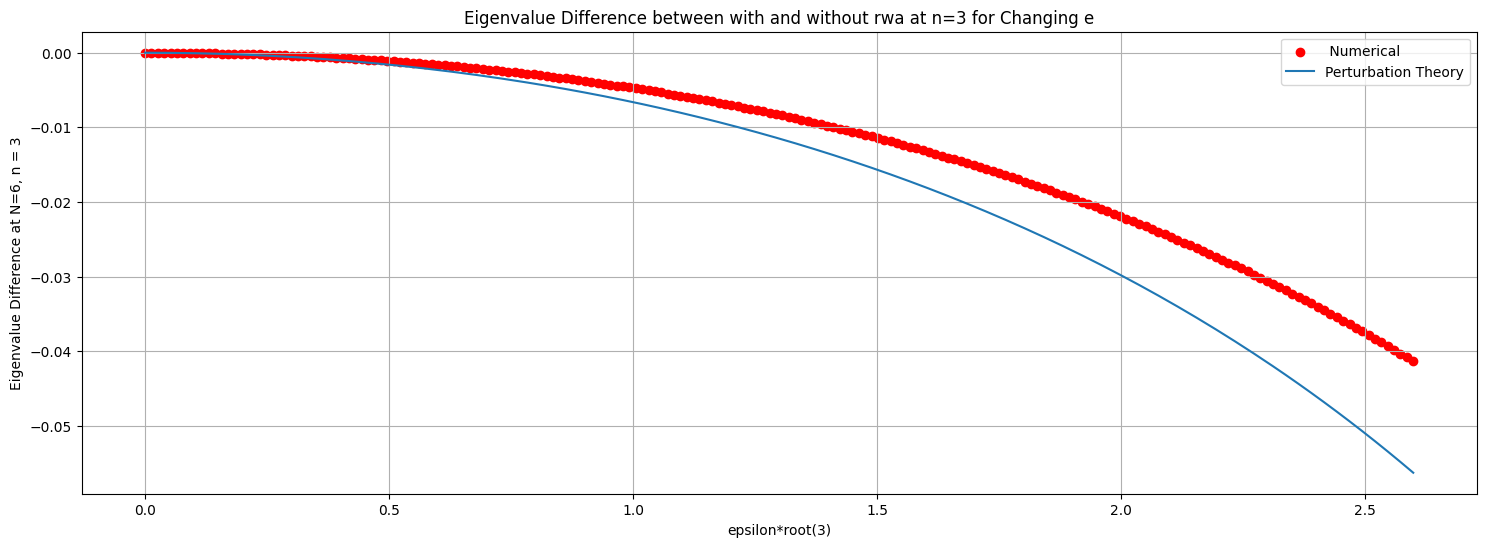

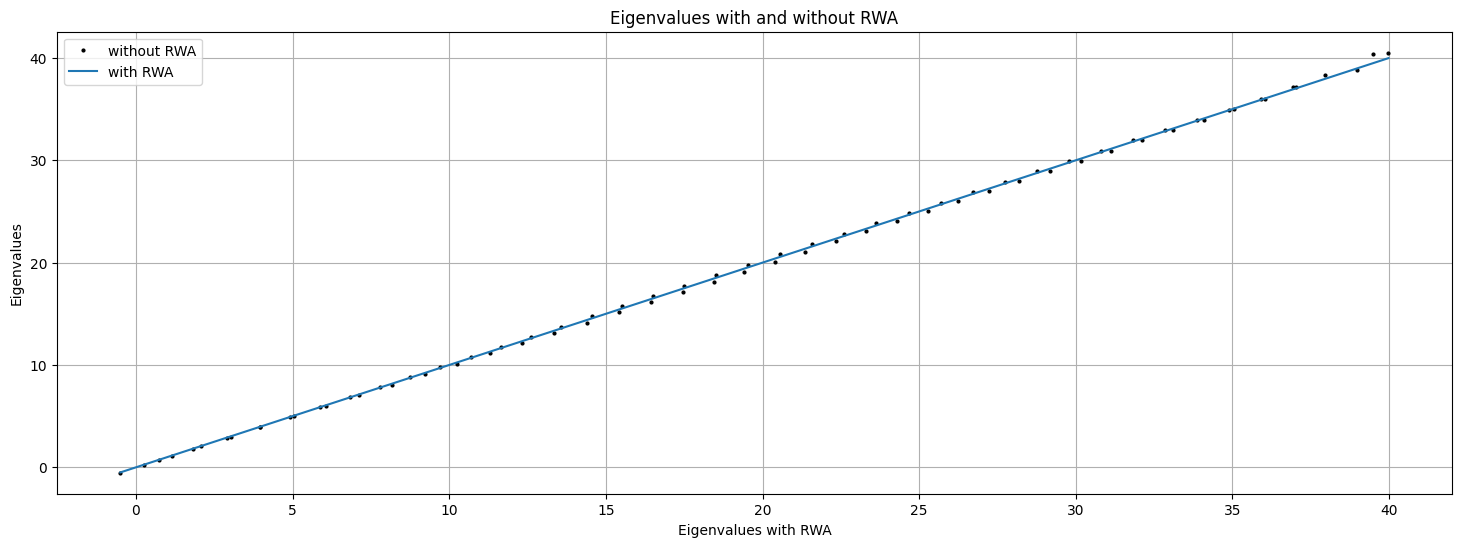

In [279]:
import numpy as np


ep=[]
s=[]
N= 40

i_vals = np.linspace(0, 1.5, 200)

new_unit=[]
for i in range(0,N):
    new_unit.append(1/np.sqrt([i]))

for i in i_vals:
    
    e=i/np.sqrt(N)


    times = np.linspace(0.0, 20.0, 800)
    psi0 = tensor(fock(N, 0), fock(2,1) )

    psi1 = tensor(fock(N, 1), fock(2,1) )
    a = tensor(destroy(N),qeye(2))
    sm = tensor(qeye(N),destroy(2))
    sigma_z = -tensor(qeye(N),sigmaz())

    H0 = 1 * a.dag() * a + 1/2 * sigma_z        
    H1 = e * ((a.dag() * sm) + (sm.dag()*a)) #truncation / approximation
    H = H0 + H1
    H=H

    num_eigenstates = 2*N
        # Find the eigenstates of the Hamiltonian
    evals = H.eigenenergies()
        # Time evolution
        # Check higher eigenstates

    evals=np.array(evals)

    n=N-1

    H2 = e * (a.dag() + a) * (sm + sm.dag()) 
            
    H3 = H0 + H2
    H3=H3
    evals2=H3.eigenenergies()
    evals2=np.array(evals2)


    s.append(evals2[6]-evals[6])
    ep.append(e)
    

a=[]
for e in ep:
    a.append( (-e**2 *3/ (2*(1.5+e*np.sqrt(5)+0.5-e*np.sqrt(3))) - e**2 *3/ (2*(-5/2+e*np.sqrt(1)+0.5-e*np.sqrt(3)))  -e**2 *3/ (2*(1.5-e*np.sqrt(5)+0.5-e*np.sqrt(3))) +e**2 *3/ (2*(-5/2-e*np.sqrt(1)+0.5-e*np.sqrt(3))))/ 2)
    
    

print(s)

plt.scatter(np.array(ep)*np.sqrt(N)*np.sqrt(3),np.array(s), color="red", label=" Numerical") #missing a factor of approx 11.1
plt.plot(np.array(ep)*np.sqrt(N)*np.sqrt(3),a, label="Perturbation Theory")


plt.xlabel('epsilon*root(3)')
plt.title("Eigenvalue Difference between with and without rwa at n=3 for Changing e")
plt.grid()
plt.legend()
plt.ylabel("Eigenvalue Difference at N=6, n = 3")
plt.show()
#plt.plot(evals[::2],s)
    
mpl.rc("figure", figsize=(18, 6))


plt.plot(evals,evals2, 'o',markersize=2,color="black", label="without RWA")
plt.plot(evals, evals, label="with RWA")

plt.xlabel("Eigenvalues with RWA")
plt.ylabel("Eigenvalues")
plt.title("Eigenvalues with and without RWA") 
plt.legend()
plt.grid()
#plt.plot(evals,evals)
plt.show()

    

[np.float64(0.44721359549995776), np.float64(0.44721359549995776), np.float64(0.6324555320336755), np.float64(0.6324555320336755), np.float64(0.774596669241483), np.float64(0.774596669241483), np.float64(0.8944271909999153), np.float64(0.8944271909999153), np.float64(0.9999999999999991), np.float64(0.9999999999999991), np.float64(1.0954451150103317), np.float64(1.0954451150103317), np.float64(1.1832159566199225), np.float64(1.1832159566199225), np.float64(1.264911064067352), np.float64(1.264911064067352), np.float64(1.3416407864998732), np.float64(1.3416407864998732), np.float64(1.414213562373094), np.float64(1.414213562373094)]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] 20


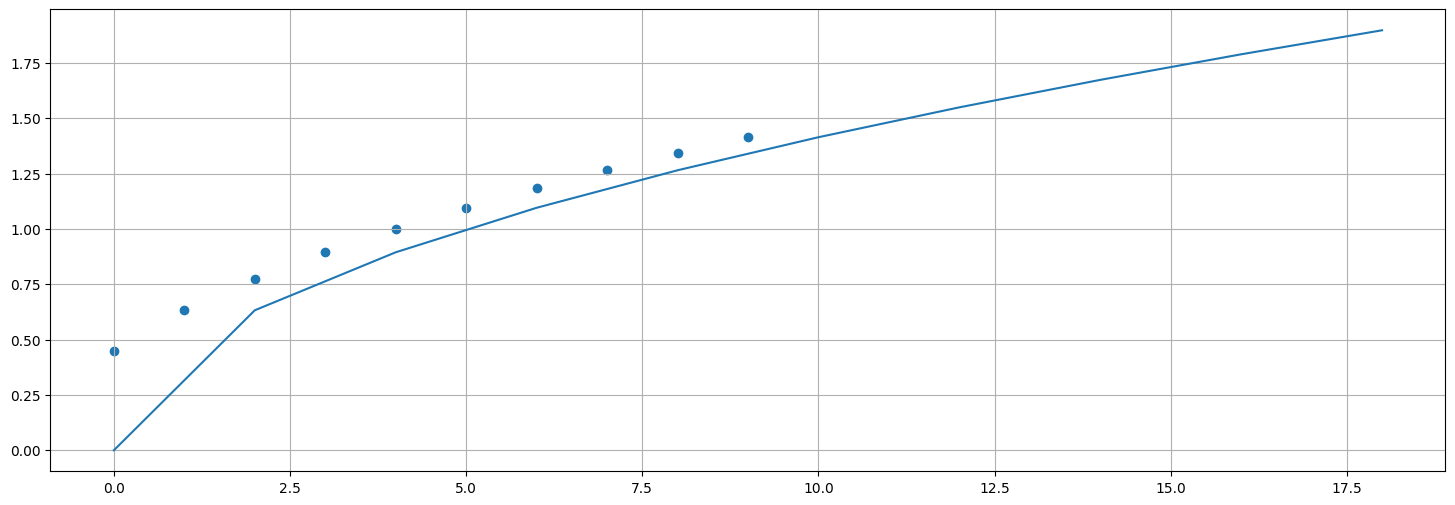

In [172]:
import numpy as np

N= 20
e=2/np.sqrt(N)

n=[]
for i in range(0,N):
    n.append(i)


times = np.linspace(0.0, 20.0, 800)
psi0 = tensor(fock(N, 0), fock(2,1) )

psi1 = tensor(fock(N, 1), fock(2,1) )
a = tensor(destroy(N),qeye(2))
sm = tensor(qeye(N),destroy(2))
sigma_z = -tensor(qeye(N),sigmaz())

H0 = 1 * a.dag() * a + 1/2 * sigma_z        
H1 = e/2 * ((a.dag() * sm) + (sm.dag()*a)) #truncation / approximation
H = H0 + H1
H=H

num_eigenstates = 2*N
    # Find the eigenstates of the Hamiltonian
evals, evecs = H.eigenstates()
    # Time evolution
    # Check higher eigenstates

big_truth = []




for i in range(N):
    if i % 2 == 1:
        continue
    small_truth = np.full(2*N, True)
    small_truth[i+1] = False
    small_truth[i+2] = False
    big_truth.append((small_truth))

#print(big_truth)

e_gap=[]
for bt in big_truth:
    for i in range(0,len(evals)):
        truth_arr_i = np.array((evecs[i].full())).flatten() == 0
        for j in range(0,len(evals)):
            truth_arr_j = np.array((evecs[j].full())).flatten() == 0
            if np.all(truth_arr_i==bt) and np.all(truth_arr_j==bt) and evecs[i]!=evecs[j]:
                e_gap.append(np.abs(evals[j]-evals[i]))
                break
  

print((e_gap))
print(n,N)

mpl.rc("figure", figsize=(18, 6))
plt.scatter(np.array(n[::2])/2,e_gap[::2])

plt.plot(n[::2],e* np.sqrt(n[::2]))
plt.grid()
    

[np.float64(0.6324555320336755), np.float64(0.6324555320336755), np.float64(0.774596669241483), np.float64(0.774596669241483), np.float64(0.8944271909999153), np.float64(0.8944271909999153), np.float64(0.9999999999999991), np.float64(0.9999999999999991), np.float64(1.0954451150103317), np.float64(1.0954451150103317), np.float64(1.1832159566199225), np.float64(1.1832159566199225), np.float64(1.264911064067352), np.float64(1.264911064067352), np.float64(1.3416407864998732), np.float64(1.3416407864998732), np.float64(1.414213562373094), np.float64(1.414213562373094)]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] 20


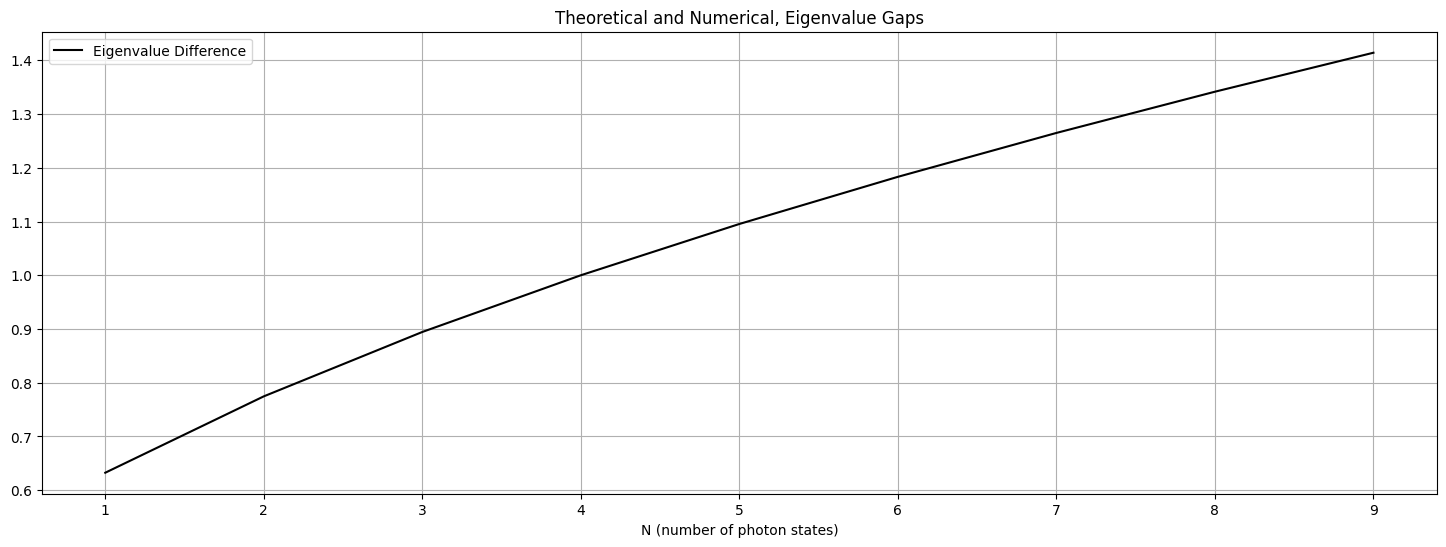

In [216]:
import numpy as np

N= 20
e=2/np.sqrt(N)

n=[]
for i in range(2,N):
    n.append(i)


times = np.linspace(0.0, 20.0, 800)
psi0 = tensor(fock(N, 0), fock(2,1) )

psi1 = tensor(fock(N, 1), fock(2,1) )
a = tensor(destroy(N),qeye(2))
sm = tensor(qeye(N),destroy(2))
sigma_z = -tensor(qeye(N),sigmaz())

H0 = 1 * a.dag() * a + 1/2 * sigma_z        
H1 = e/2 * ((a.dag() * sm) + (sm.dag()*a)) #truncation / approximation
H = H0 + H1
H=H

num_eigenstates = 2*N
    # Find the eigenstates of the Hamiltonian
evals, evecs = H.eigenstates()
    # Time evolution
    # Check higher eigenstates

big_truth = []

for i in range(2,N):
    if i % 2 == 1:
        continue
    small_truth = np.full(2*N, True)
    small_truth[i+1] = False
    small_truth[i+2] = False
    big_truth.append((small_truth))

#print(big_truth)

e_gap=[]
for bt in big_truth:
    for i in range(0,len(evals)):
        truth_arr_i = np.array((evecs[i].full())).flatten() == 0
        for j in range(0,len(evals)):
            truth_arr_j = np.array((evecs[j].full())).flatten() == 0
            if np.all(truth_arr_i==bt) and np.all(truth_arr_j==bt) and evecs[i]!=evecs[j]:
                e_gap.append(np.abs(evals[j]-evals[i]))
                break
  

print((e_gap))
print(n,N)

mpl.rc("figure", figsize=(18, 6))
plt.xlabel("N (number of photon states)")
plt.plot(np.array(n[::2])/2,e_gap[::2],label="Eigenvalue Difference", color="black")

plt.plot(n[::2],e* np.sqrt(n[::2]),label="e*sqrtN")
plt.legend()
plt.title("Theoretical and Numerical, Eigenvalue Gaps")
plt.grid()
    

[np.float64(85.0), np.float64(85.03742994994236), np.float64(85.14889156509221), np.float64(85.33198915988591), np.float64(85.58300524425836), np.float64(85.89724735885169), np.float64(86.26942766958464), np.float64(86.6940155635265), np.float64(87.16552506059644), np.float64(87.67872233310597), np.float64(88.22875655532295), np.float64(88.81122731693313), np.float64(89.42220510185595), np.float64(90.05822034637559), np.float64(90.71623364550172), np.float64(91.393596310755), np.float64(92.08800749063506), np.float64(92.79747173055769), np.float64(93.52025917745213), np.float64(94.25486951396971), np.float64(95.0), np.float64(95.75451758051726), np.float64(96.51743479135001), np.float64(97.28788908802267), np.float64(98.06512518934159), np.float64(98.84848003542365), np.float64(99.63736998950984), np.float64(100.43127995205904), np.float64(101.229754097208), np.float64(102.03238798182655), np.float64(102.83882181415011), np.float64(103.64873470155358), np.float64(104.46183972531247), n

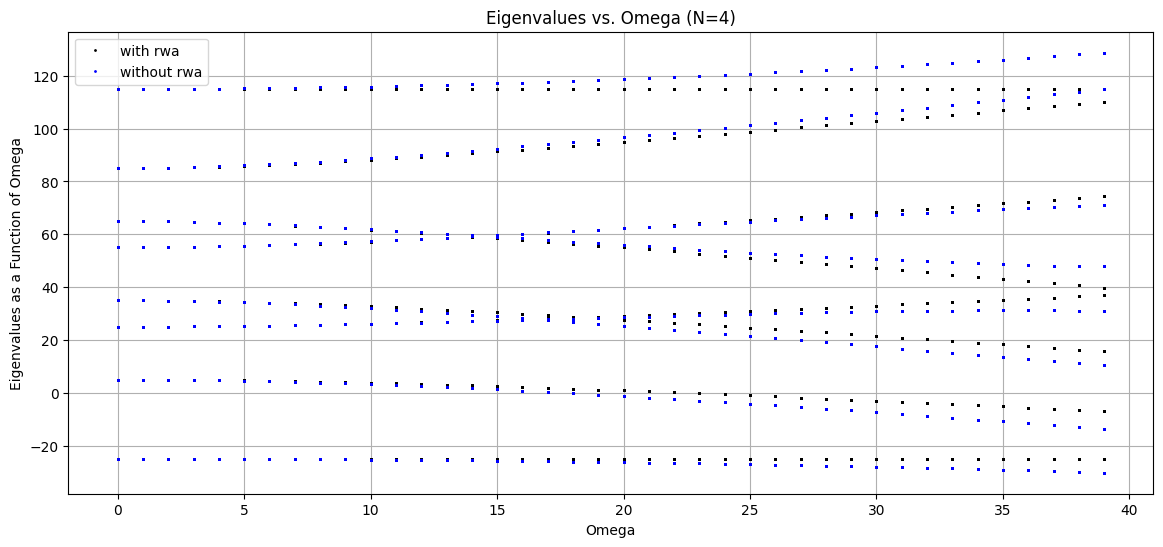

In [270]:
#eigenenergies as a func of omega

wc= 30
wa= 50
d = wa-wc
Omega_vals =[]

N=4
e_vals=[]
e_vals_without=[]

analytical_e1 =[]
analytical_e2 =[]

for i in range(0,40):
        
    Omega = i
    Omega_vals.append(Omega)
    times = np.linspace(0.0, 20.0, 800)
    psi0 = tensor(fock(N, 0), fock(2,1) )
    psi1 = tensor(fock(N, 1), fock(2,1) )
    a = tensor(destroy(N),qeye(2))
    sm = tensor(qeye(N),destroy(2))
    sigma_z = -tensor(qeye(N),sigmaz())

    H0 = wc * a.dag() * a + wa/2 * sigma_z
    H1 = Omega/2 * ((a.dag() * sm) + (sm.dag()*a)) #truncation / approximation
    H = H0 + H1
    num_eigenstates = 2*N
    
    H1_without = Omega/2 * (a.dag() + a) * (sm + sm.dag()) 
    H_without=H0 + H1_without

    
    # Find the eigenstates of the Hamiltonian
    evals = H.eigenenergies()
    evals_without=H_without.eigenenergies()

    e_vals.append(evals)
    e_vals_without.append(evals_without)
    n=N-1
    analytical_e1.append((n-1/2)*wc + np.sqrt((d/2)**2+n*((Omega/2)**2)))
    analytical_e2.append( (n-1/2)*wc - np.sqrt((d/2)**2+n*((Omega/2)**2)) )


    mpl.rc("figure", figsize=(14, 6))

#you know that for each Omega you have 2*N eigenvalues
#so it goes like e_vals[0],e_vals[1],..e_vals[3] for Omega = 0, and e_vals[4],...,e_vals[7] for Omega=1 etc.

#Plot the analytical lines
print(analytical_e1)
print(analytical_e2)
#for y in analytical_e1:
 #   plt.axhline(y=y, color='gray', linestyle='--')  # Adjust line style and color as needed
#for y2 in analytical_e2:
 #   plt.axhline(y=y2, color='black', linestyle='--')  # Adjust line style and color as needed
        
# Initialize flags for legend labels
label_added_H = False
label_added_H_without = False

for j in range(0, len(Omega_vals)):
    for i, evals in enumerate(e_vals):
        if not label_added_H:  # Add the label only once for `e_vals`
            plt.plot([i] * 2 * N, evals, 'o', markersize=1, color="black", label="with rwa")
            label_added_H = True
        else:
            plt.plot([i] * 2 * N, evals, 'o', markersize=1, color="black")

for j in range(0, len(Omega_vals)):
    for i, evals_without in enumerate(e_vals_without):
        if not label_added_H_without:  # Add the label only once for `e_vals_without`
            plt.plot([i] * 2 * N, evals_without, 'o', markersize=1, color="blue", label="without rwa")
            label_added_H_without = True
        else:
            plt.plot([i] * 2 * N, evals_without, 'o', markersize=1, color="blue")
  
plt.xlabel("Omega")
plt.ylabel("Eigenvalues as a Function of Omega")
plt.title("Eigenvalues vs. Omega (N=4)") #Note that these are the coefficients of psi0 and psi1 i.e. ground and excited states not the eigenstates!!
plt.legend()
plt.grid()
plt.show()
        

/var/folders/f7/bgyj513d5qj_1w7dm650_8cc0000gn/T/ipykernel_1085/3431202118.py:75: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


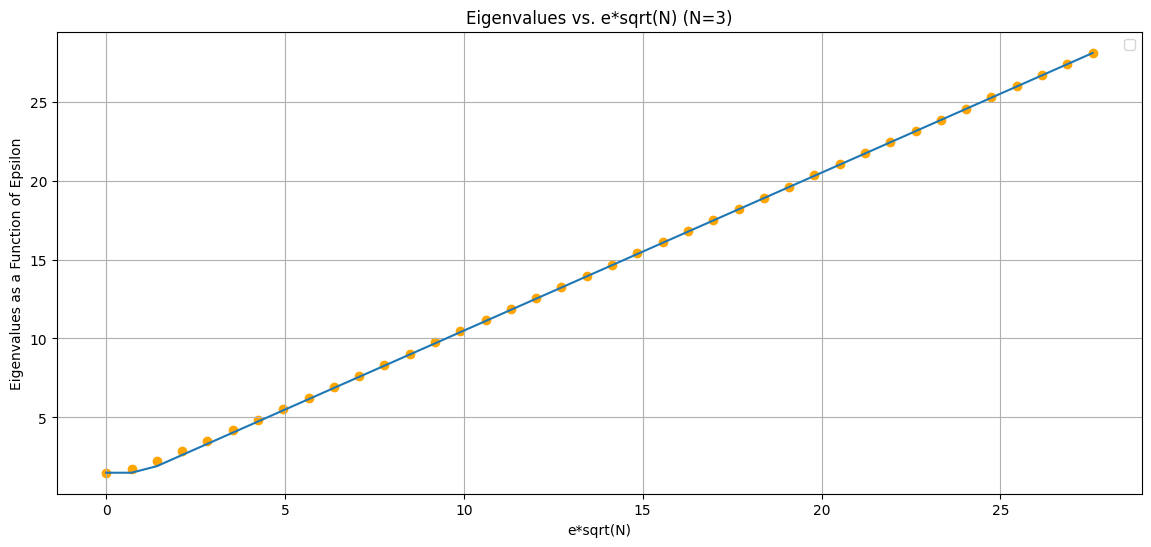

In [295]:
#eigenenergies as a func of omega

wc= 30
wa= 30
d = wa-wc
Omega_vals =[]

N=2
e_vals=[]
e_vals_without=[]

max_vals=[]
max_vals2=[]


for i in range(0,40):
    e=i/np.sqrt(N)
    Omega_vals.append(e)
    times = np.linspace(0.0, 20.0, 800)
    psi0 = tensor(fock(N, 0), fock(2,1) )
    psi1 = tensor(fock(N, 1), fock(2,1) )
    a = tensor(destroy(N),qeye(2))
    sm = tensor(qeye(N),destroy(2))
    sigma_z = -tensor(qeye(N),sigmaz())

    H0 = 1 * a.dag() * a + 1/2 * sigma_z
    H1 = e * ((a.dag() * sm) + (sm.dag()*a)) #truncation / approximation
    H = H0 + H1
    num_eigenstates = 2*N
    
    H1_without = e * (a.dag() + a) * (sm + sm.dag()) 
    H_without=H0 + H1_without

    
    # Find the eigenstates of the Hamiltonian
    evals = H.eigenenergies()
    evals_without=H_without.eigenenergies()

    e_vals.append(evals)
    e_vals_without.append(evals_without)

    max_vals.append(evals[2*N-1])
    max_vals2.append(evals_without[2*N-1])
#you know that for each Omega you have 2*N eigenvalues
#so it goes like e_vals[0],e_vals[1],..e_vals[3] for Omega = 0, and e_vals[4],...,e_vals[7] for Omega=1 etc.


# Initialize flags for legend labels
label_added_H = False
label_added_H_without = False
"""
for j in range(0, len(Omega_vals)):
    for i, evals in enumerate(e_vals):
        if not label_added_H:  # Add the label only once for `e_vals`
            plt.plot([i] * 2 * N, evals, 'o', markersize=1, color="black", label="with rwa")
            label_added_H = True
        else:
            plt.plot([i] * 2 * N, evals, 'o', markersize=1, color="black")

for j in range(0, len(Omega_vals)):
    for i, evals_without in enumerate(e_vals_without):
        if not label_added_H_without:  # Add the label only once for `e_vals_without`
            plt.plot([i] * 2 * N, evals_without, 'o', markersize=1, color="blue", label="without rwa")
            label_added_H_without = True
        else:
            plt.plot([i] * 2 * N, evals_without, 'o', markersize=1, color="blue")
"""
plt.plot(Omega_vals,max_vals)
plt.scatter(Omega_vals,max_vals2,color="orange")

  
plt.xlabel("e*sqrt(N)")
plt.ylabel("Eigenvalues as a Function of Epsilon")
plt.title("Eigenvalues vs. e*sqrt(N) (N=3)") #Note that these are the coefficients of psi0 and psi1 i.e. ground and excited states not the eigenstates!!
plt.legend()
plt.grid()
plt.show()

